In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal


True

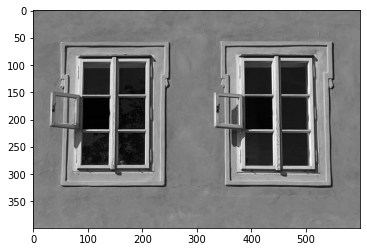

In [2]:
# #隨機產生9*9圖片
# randimg= np.random.randint(0,256, size=(28,28))

randimg =cv2.imread("demonstrating.jpg",0)

# randimg = randimg.astype("float32")
randimg =  np.float64(randimg)

plt.imshow(randimg, cmap=plt.get_cmap('gray'))
cv2.imwrite("grayscale32.jpg",randimg)

In [12]:
"""
Creat 3*3 Gaussian Kernel
"""


def After_gaussian_filter(img,sigma):
    
    #ref:http://louistiao.me/posts/numpy-mgrid-vs-meshgrid/
    y,x = np.mgrid[1:-2:-1,-1:2:1 ]
    print("-----x------")
    print(x)
    print("-----y------")
    print(y)
    
    gaussian_kernel = np.exp(-(x**2+y**2)/2.0/sigma**2) / (2*np.pi*sigma**2)

    #除以整個filter的權重
    gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()

    plt.imshow(gaussian_kernel, cmap=plt.get_cmap('gray'), interpolation='None')
    plt.show(plt.colorbar())
               
    print(gaussian_kernel)
    
    
    """
    Convolve 3*3 Gassian Kernel with Image
    """   
    
    #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #灰階
    #plt.imshow(gray, cmap=plt.get_cmap('gray'))
    
    
    grad = signal.convolve2d(img, gaussian_kernel, boundary='fill', mode='same') #卷積
    #cv2.imwrite("Street_gray_afterGaussianfilter.jpg",grad*255)
#     plt.imshow(grad, cmap=plt.get_cmap('gray'))
    return grad
    
    



-----x------
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
-----y------
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


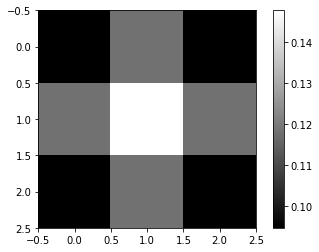

[[0.09474166 0.11831801 0.09474166]
 [0.11831801 0.14776132 0.11831801]
 [0.09474166 0.11831801 0.09474166]]


True

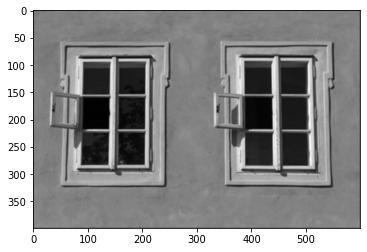

In [13]:
BlurImgSelf = After_gaussian_filter(randimg,1.5)
plt.imshow(BlurImgSelf, cmap=plt.get_cmap('gray'))
cv2.imwrite("BlurImg64_1.5.jpg",BlurImgSelf)

In [ ]:
# BlurImg = cv2.GaussianBlur(randimg,(3,3),5)
# plt.imshow(BlurImg, cmap=plt.get_cmap('gray'))


# Generate angle matrix

In [5]:
def EdgeDetectorGenerator(operator):
    
    filter = np.zeros((3,3))
    
    if operator == "Xaxis":
        for i in range(0,3):
            for j in range(0,3):
                if j ==0:
                    filter[i][j] = -1
                if j ==2:
                    filter[i][j] = 1


    if operator == "Yaxis":
        for i in range(0,3):
            for j in range(0,3):
                if i ==0:
                    filter[i][j] = 1
                if i ==2:
                    filter[i][j] = -1
                    
    if operator == "SobelY":
        filter = [[1,2,1],[0,0,0],[-1,-2,-1]]
    
    if operator =="SobelX":
        filter =  [[-1,0,1],[-2,0,2],[-1,0,1]]
        
    return np.asarray(filter)

    
            
        
        


In [14]:
eta = float(10e-12);

#加上eta至分母避免除以零狀況發生
sobelfilterX = EdgeDetectorGenerator("SobelX")
filteredXgray = signal.convolve2d(BlurImgSelf, sobelfilterX, boundary='fill', mode='same') #卷積
filteredXgray = filteredXgray+ eta

sobelfilterY = EdgeDetectorGenerator("SobelY")
filteredYgray = signal.convolve2d(BlurImgSelf, sobelfilterY, boundary='fill', mode='same') #卷積

In [15]:


#Create zero matrix to save gradient directional matrix 
# matrixGradDir = np.arctan2(filteredYgray,filteredXgray) 

#np.arctan2 return弧度，再轉成角度

AngleMat = np.arctan2(filteredYgray,filteredXgray) #np.arctan2 return弧度



In [ ]:
#轉換成弧度
angle = AngleMat * 180 / np.pi
#把角度限縮至 [0, 2pi]
angle += 180

M,N = angle.shape

f= open("GradientAngle32.txt","w+")

for i in range(1,M-1):
    tmpRow = []
    for j in range(1,N-1):

           #angle 0
            if (-22.5 <= angle[i,j] < 22.5):
                tmpRow.append('→ ')
                
            elif(157.5 <= angle[i,j] < 202.5):
                tmpRow.append('← ')

            #angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                tmpRow.append('↗ ')
            
            elif (202.5 <= angle[i,j] < 247.5):
                tmpRow.append('↙ ')
                
            #angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                tmpRow.append('↑ ')
            elif (247.5 <= angle[i,j] < 292.5):
                tmpRow.append('↓ ')
                
                
            #angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                tmpRow.append('↖ ')
            elif (292.5 <= angle[i,j] < 337.5):
                tmpRow.append('↘ ')
                
            if(j==N-2):f.writelines(tmpRow)
f.close()

                
            


                
                


In [16]:
MagnitudeMat = np.sqrt(filteredXgray*filteredXgray +filteredYgray*filteredYgray)

In [23]:
MagnitudeMat = np.uint8(MagnitudeMat)

In [24]:
cv2.imwrite("_Magnitude64_15.jpg",MagnitudeMat)

True

# 參考Magnitude histogram，統一乘上某個scalar(測試中...)

In [ ]:
#plt.hist(np.floor(MagnitudeMat.ravel()),density=True,histtype='bar',cd) #看Magnitude的分布


In [ ]:
# plt.hist(MagnitudeMat.ravel(), cumulative=True, label='CDF DATA', histtype='stepfilled',density=True, color='blue')

In [ ]:
#plt.hist(cdfMagnitude, bins='auto') 


In [ ]:
# tmp = np.array(MagnitudeMat, copy=True) 
# tmp.ravel().sort()
# ScaleMagnitude = tmp.ravel()
# ScaleMagnitude = ScaleMagnitude[ScaleMagnitude>0]


In [ ]:
# index = (239400-237588 + 0.9*235788)
# Scalefactor = 255/ScaleMagnitude[214021]

In [ ]:
# plt.hist(, cumulative=True, label='CDF DATA', 
#          histtype='stepfilled',density=True, color='blue')

In [ ]:


#Create zero matrix to save gradient directional matrix 
# matrixGradDir = np.arctan2(filteredYgray,filteredXgray) 

#np.arctan2 return弧度，再轉成角度

AngleMat = np.arctan2(filteredYgray,filteredXgray) #np.arctan2 return弧度，再轉成角度




# Non_max_suppression based on four direction

In [25]:
def non_max_suppression(img, D): #img:要處理的矩陣 D:Gy/Gx
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.float32)
    
    
    #轉換成弧度
    angle = D * 180 / np.pi
    #把角度限縮至 [0, pi]
    angle[angle<0] += 180
    

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                neighbor1 = 0
                neighbor2 = 0
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    neighbor1 = img[i, j+1]
                    neighbor2 = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    neighbor1 = img[i+1, j-1]
                    neighbor2 = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    neighbor1 = img[i+1, j]
                    neighbor2 = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    neighbor1 = img[i-1, j-1]
                    neighbor2 = img[i+1, j+1]
                    
                #對於每個pixel,若gradient方向上的鄰居的gradient intensity沒此pixel大，則保留這個pixel的gradient intensity

                if (img[i,j] >= neighbor1) and (img[i,j] >= neighbor2):
                    Z[i,j] = img[i,j]
                    
                    print("i={},j={}".format(i,j))
                    
                else:
                    Z[i,j] = 0

            except IndexError as e:
                print("------------------------------index err-------------------")
                print("------------------------------index err-------------------")
                print("------------------------------index err-------------------")
                print("------------------------------index err-------------------")

                pass
    
    return Z

i=1,j=1
i=1,j=43
i=1,j=44
i=1,j=45
i=1,j=46
i=1,j=47
i=1,j=48
i=1,j=49
i=1,j=50
i=1,j=51
i=1,j=52
i=1,j=53
i=1,j=54
i=1,j=102
i=1,j=103
i=1,j=104
i=1,j=105
i=1,j=106
i=1,j=107
i=1,j=108
i=1,j=126
i=1,j=127
i=1,j=128
i=1,j=129
i=1,j=130
i=1,j=131
i=1,j=132
i=1,j=133
i=1,j=134
i=1,j=135
i=1,j=136
i=1,j=137
i=1,j=138
i=1,j=139
i=1,j=140
i=1,j=141
i=1,j=142
i=1,j=143
i=1,j=144
i=1,j=145
i=1,j=146
i=1,j=147
i=1,j=156
i=1,j=157
i=1,j=158
i=1,j=159
i=1,j=160
i=1,j=161
i=1,j=162
i=1,j=163
i=1,j=164
i=1,j=165
i=1,j=166
i=1,j=167
i=1,j=168
i=1,j=169
i=1,j=170
i=1,j=171
i=1,j=172
i=1,j=173
i=1,j=174
i=1,j=175
i=1,j=176
i=1,j=182
i=1,j=183
i=1,j=184
i=1,j=185
i=1,j=186
i=1,j=187
i=1,j=188
i=1,j=189
i=1,j=190
i=1,j=191
i=1,j=192
i=1,j=193
i=1,j=194
i=1,j=195
i=1,j=196
i=1,j=197
i=1,j=198
i=1,j=199
i=1,j=200
i=1,j=201
i=1,j=202
i=1,j=203
i=1,j=204
i=1,j=205
i=1,j=206
i=1,j=225
i=1,j=226
i=1,j=227
i=1,j=228
i=1,j=229
i=1,j=230
i=1,j=231
i=1,j=232
i=1,j=233
i=1,j=234
i=1,j=235
i=1,j=236
i=1,j=237
i=1,

i=9,j=97
i=9,j=98
i=9,j=99
i=9,j=101
i=9,j=102
i=9,j=109
i=9,j=111
i=9,j=112
i=9,j=116
i=9,j=117
i=9,j=122
i=9,j=123
i=9,j=124
i=9,j=128
i=9,j=135
i=9,j=136
i=9,j=137
i=9,j=142
i=9,j=143
i=9,j=145
i=9,j=146
i=9,j=151
i=9,j=156
i=9,j=157
i=9,j=162
i=9,j=164
i=9,j=165
i=9,j=166
i=9,j=167
i=9,j=169
i=9,j=171
i=9,j=174
i=9,j=177
i=9,j=180
i=9,j=182
i=9,j=183
i=9,j=190
i=9,j=191
i=9,j=196
i=9,j=203
i=9,j=212
i=9,j=227
i=9,j=228
i=9,j=231
i=9,j=232
i=9,j=233
i=9,j=237
i=9,j=243
i=9,j=244
i=9,j=247
i=9,j=248
i=9,j=249
i=9,j=250
i=9,j=251
i=9,j=252
i=9,j=253
i=9,j=254
i=9,j=257
i=9,j=258
i=9,j=259
i=9,j=264
i=9,j=265
i=9,j=276
i=9,j=277
i=9,j=280
i=9,j=281
i=9,j=282
i=9,j=284
i=9,j=285
i=9,j=289
i=9,j=296
i=9,j=297
i=9,j=299
i=9,j=302
i=9,j=303
i=9,j=305
i=9,j=306
i=9,j=307
i=9,j=313
i=9,j=314
i=9,j=315
i=9,j=316
i=9,j=319
i=9,j=322
i=9,j=323
i=9,j=329
i=9,j=330
i=9,j=331
i=9,j=332
i=9,j=333
i=9,j=334
i=9,j=335
i=9,j=345
i=9,j=346
i=9,j=347
i=9,j=348
i=9,j=349
i=9,j=350
i=9,j=351
i=9,j=354
i=9

i=16,j=551
i=16,j=554
i=16,j=555
i=16,j=566
i=16,j=567
i=16,j=568
i=16,j=569
i=16,j=570
i=16,j=571
i=16,j=572
i=16,j=573
i=16,j=574
i=16,j=585
i=16,j=587
i=16,j=591
i=16,j=592
i=16,j=594
i=17,j=2
i=17,j=3
i=17,j=11
i=17,j=12
i=17,j=13
i=17,j=16
i=17,j=21
i=17,j=24
i=17,j=25
i=17,j=28
i=17,j=29
i=17,j=33
i=17,j=34
i=17,j=39
i=17,j=40
i=17,j=42
i=17,j=46
i=17,j=47
i=17,j=48
i=17,j=57
i=17,j=60
i=17,j=61
i=17,j=62
i=17,j=63
i=17,j=67
i=17,j=68
i=17,j=75
i=17,j=76
i=17,j=84
i=17,j=90
i=17,j=93
i=17,j=94
i=17,j=95
i=17,j=96
i=17,j=101
i=17,j=104
i=17,j=105
i=17,j=106
i=17,j=113
i=17,j=121
i=17,j=122
i=17,j=126
i=17,j=128
i=17,j=129
i=17,j=130
i=17,j=131
i=17,j=132
i=17,j=136
i=17,j=137
i=17,j=143
i=17,j=144
i=17,j=147
i=17,j=150
i=17,j=151
i=17,j=158
i=17,j=159
i=17,j=167
i=17,j=177
i=17,j=180
i=17,j=183
i=17,j=193
i=17,j=197
i=17,j=198
i=17,j=202
i=17,j=203
i=17,j=204
i=17,j=205
i=17,j=206
i=17,j=207
i=17,j=211
i=17,j=213
i=17,j=214
i=17,j=219
i=17,j=224
i=17,j=228
i=17,j=229
i=17,j=230
i=

i=26,j=218
i=26,j=220
i=26,j=221
i=26,j=224
i=26,j=225
i=26,j=229
i=26,j=233
i=26,j=234
i=26,j=238
i=26,j=239
i=26,j=240
i=26,j=245
i=26,j=246
i=26,j=251
i=26,j=256
i=26,j=257
i=26,j=264
i=26,j=268
i=26,j=278
i=26,j=279
i=26,j=280
i=26,j=285
i=26,j=286
i=26,j=290
i=26,j=293
i=26,j=294
i=26,j=296
i=26,j=297
i=26,j=298
i=26,j=299
i=26,j=300
i=26,j=303
i=26,j=305
i=26,j=309
i=26,j=310
i=26,j=311
i=26,j=317
i=26,j=321
i=26,j=331
i=26,j=338
i=26,j=342
i=26,j=345
i=26,j=349
i=26,j=352
i=26,j=353
i=26,j=354
i=26,j=355
i=26,j=356
i=26,j=368
i=26,j=375
i=26,j=383
i=26,j=384
i=26,j=385
i=26,j=386
i=26,j=387
i=26,j=388
i=26,j=389
i=26,j=390
i=26,j=391
i=26,j=402
i=26,j=405
i=26,j=412
i=26,j=415
i=26,j=416
i=26,j=417
i=26,j=423
i=26,j=427
i=26,j=428
i=26,j=429
i=26,j=430
i=26,j=438
i=26,j=456
i=26,j=457
i=26,j=458
i=26,j=459
i=26,j=460
i=26,j=461
i=26,j=462
i=26,j=463
i=26,j=471
i=26,j=473
i=26,j=474
i=26,j=480
i=26,j=481
i=26,j=482
i=26,j=484
i=26,j=485
i=26,j=486
i=26,j=489
i=26,j=490
i=26,j=491

i=35,j=401
i=35,j=406
i=35,j=416
i=35,j=418
i=35,j=419
i=35,j=420
i=35,j=423
i=35,j=424
i=35,j=425
i=35,j=431
i=35,j=433
i=35,j=434
i=35,j=435
i=35,j=436
i=35,j=437
i=35,j=438
i=35,j=445
i=35,j=446
i=35,j=449
i=35,j=452
i=35,j=459
i=35,j=463
i=35,j=464
i=35,j=467
i=35,j=470
i=35,j=471
i=35,j=473
i=35,j=478
i=35,j=485
i=35,j=488
i=35,j=489
i=35,j=492
i=35,j=495
i=35,j=498
i=35,j=503
i=35,j=504
i=35,j=505
i=35,j=510
i=35,j=511
i=35,j=514
i=35,j=517
i=35,j=523
i=35,j=525
i=35,j=530
i=35,j=531
i=35,j=532
i=35,j=533
i=35,j=534
i=35,j=537
i=35,j=543
i=35,j=544
i=35,j=550
i=35,j=553
i=35,j=554
i=35,j=558
i=35,j=559
i=35,j=563
i=35,j=564
i=35,j=565
i=35,j=573
i=35,j=574
i=35,j=575
i=35,j=581
i=35,j=582
i=35,j=583
i=35,j=584
i=35,j=585
i=35,j=586
i=35,j=587
i=35,j=588
i=35,j=589
i=35,j=590
i=35,j=591
i=35,j=592
i=35,j=593
i=35,j=594
i=35,j=595
i=36,j=8
i=36,j=11
i=36,j=17
i=36,j=18
i=36,j=27
i=36,j=29
i=36,j=30
i=36,j=33
i=36,j=45
i=36,j=46
i=36,j=47
i=36,j=48
i=36,j=51
i=36,j=53
i=36,j=56
i=36

i=44,j=424
i=44,j=427
i=44,j=430
i=44,j=431
i=44,j=433
i=44,j=434
i=44,j=436
i=44,j=440
i=44,j=441
i=44,j=443
i=44,j=444
i=44,j=445
i=44,j=446
i=44,j=447
i=44,j=448
i=44,j=450
i=44,j=451
i=44,j=463
i=44,j=464
i=44,j=465
i=44,j=471
i=44,j=472
i=44,j=482
i=44,j=483
i=44,j=484
i=44,j=485
i=44,j=486
i=44,j=487
i=44,j=488
i=44,j=489
i=44,j=490
i=44,j=491
i=44,j=495
i=44,j=496
i=44,j=508
i=44,j=511
i=44,j=512
i=44,j=516
i=44,j=522
i=44,j=524
i=44,j=527
i=44,j=531
i=44,j=537
i=44,j=543
i=44,j=547
i=44,j=548
i=44,j=549
i=44,j=550
i=44,j=553
i=44,j=557
i=44,j=558
i=44,j=559
i=44,j=560
i=44,j=561
i=44,j=564
i=44,j=565
i=44,j=570
i=44,j=576
i=44,j=579
i=44,j=580
i=44,j=581
i=44,j=582
i=44,j=583
i=44,j=584
i=44,j=585
i=44,j=586
i=44,j=587
i=44,j=589
i=44,j=590
i=44,j=591
i=44,j=592
i=44,j=596
i=44,j=597
i=44,j=598
i=45,j=5
i=45,j=14
i=45,j=15
i=45,j=17
i=45,j=18
i=45,j=19
i=45,j=22
i=45,j=23
i=45,j=24
i=45,j=25
i=45,j=26
i=45,j=29
i=45,j=32
i=45,j=38
i=45,j=41
i=45,j=42
i=45,j=49
i=45,j=50
i=45,j=

i=54,j=258
i=54,j=259
i=54,j=260
i=54,j=261
i=54,j=262
i=54,j=273
i=54,j=274
i=54,j=275
i=54,j=276
i=54,j=277
i=54,j=278
i=54,j=279
i=54,j=280
i=54,j=285
i=54,j=290
i=54,j=291
i=54,j=294
i=54,j=295
i=54,j=298
i=54,j=310
i=54,j=311
i=54,j=312
i=54,j=313
i=54,j=321
i=54,j=325
i=54,j=326
i=54,j=330
i=54,j=331
i=54,j=336
i=54,j=339
i=54,j=341
i=54,j=353
i=54,j=377
i=54,j=379
i=54,j=380
i=54,j=381
i=54,j=403
i=54,j=404
i=54,j=409
i=54,j=425
i=54,j=426
i=54,j=432
i=54,j=447
i=54,j=453
i=54,j=454
i=54,j=455
i=54,j=501
i=54,j=502
i=54,j=503
i=54,j=504
i=54,j=505
i=54,j=517
i=54,j=550
i=54,j=552
i=54,j=553
i=54,j=554
i=54,j=556
i=54,j=561
i=54,j=562
i=54,j=563
i=54,j=564
i=54,j=569
i=54,j=570
i=54,j=574
i=54,j=575
i=54,j=576
i=54,j=578
i=54,j=579
i=54,j=580
i=54,j=581
i=54,j=585
i=54,j=590
i=54,j=593
i=54,j=595
i=54,j=596
i=54,j=598
i=55,j=2
i=55,j=3
i=55,j=4
i=55,j=5
i=55,j=6
i=55,j=9
i=55,j=10
i=55,j=13
i=55,j=14
i=55,j=16
i=55,j=17
i=55,j=19
i=55,j=20
i=55,j=22
i=55,j=25
i=55,j=29
i=55,j=30


i=63,j=547
i=63,j=551
i=63,j=553
i=63,j=556
i=63,j=559
i=63,j=560
i=63,j=575
i=63,j=576
i=63,j=582
i=63,j=583
i=63,j=584
i=63,j=588
i=63,j=594
i=63,j=598
i=64,j=6
i=64,j=9
i=64,j=10
i=64,j=11
i=64,j=12
i=64,j=16
i=64,j=17
i=64,j=18
i=64,j=23
i=64,j=24
i=64,j=29
i=64,j=31
i=64,j=32
i=64,j=33
i=64,j=34
i=64,j=35
i=64,j=40
i=64,j=43
i=64,j=49
i=64,j=52
i=64,j=54
i=64,j=58
i=64,j=59
i=64,j=64
i=64,j=65
i=64,j=66
i=64,j=67
i=64,j=68
i=64,j=160
i=64,j=161
i=64,j=162
i=64,j=163
i=64,j=164
i=64,j=165
i=64,j=166
i=64,j=167
i=64,j=168
i=64,j=169
i=64,j=170
i=64,j=171
i=64,j=172
i=64,j=173
i=64,j=174
i=64,j=175
i=64,j=176
i=64,j=177
i=64,j=178
i=64,j=179
i=64,j=180
i=64,j=181
i=64,j=182
i=64,j=183
i=64,j=184
i=64,j=185
i=64,j=186
i=64,j=187
i=64,j=188
i=64,j=189
i=64,j=190
i=64,j=191
i=64,j=192
i=64,j=193
i=64,j=194
i=64,j=195
i=64,j=196
i=64,j=197
i=64,j=198
i=64,j=199
i=64,j=200
i=64,j=201
i=64,j=202
i=64,j=241
i=64,j=247
i=64,j=249
i=64,j=252
i=64,j=256
i=64,j=257
i=64,j=262
i=64,j=263
i=64,j=

i=74,j=82
i=74,j=89
i=74,j=90
i=74,j=91
i=74,j=92
i=74,j=93
i=74,j=94
i=74,j=95
i=74,j=96
i=74,j=97
i=74,j=98
i=74,j=107
i=74,j=124
i=74,j=136
i=74,j=140
i=74,j=146
i=74,j=147
i=74,j=148
i=74,j=149
i=74,j=154
i=74,j=158
i=74,j=174
i=74,j=175
i=74,j=176
i=74,j=180
i=74,j=181
i=74,j=182
i=74,j=191
i=74,j=196
i=74,j=197
i=74,j=198
i=74,j=199
i=74,j=203
i=74,j=204
i=74,j=205
i=74,j=206
i=74,j=208
i=74,j=212
i=74,j=218
i=74,j=219
i=74,j=226
i=74,j=227
i=74,j=228
i=74,j=229
i=74,j=230
i=74,j=234
i=74,j=237
i=74,j=240
i=74,j=243
i=74,j=247
i=74,j=252
i=74,j=256
i=74,j=259
i=74,j=262
i=74,j=265
i=74,j=268
i=74,j=271
i=74,j=272
i=74,j=275
i=74,j=276
i=74,j=279
i=74,j=282
i=74,j=283
i=74,j=288
i=74,j=292
i=74,j=300
i=74,j=303
i=74,j=304
i=74,j=305
i=74,j=311
i=74,j=312
i=74,j=314
i=74,j=317
i=74,j=320
i=74,j=321
i=74,j=332
i=74,j=333
i=74,j=335
i=74,j=336
i=74,j=338
i=74,j=344
i=74,j=346
i=74,j=350
i=74,j=352
i=74,j=356
i=74,j=358
i=74,j=359
i=74,j=360
i=74,j=366
i=74,j=367
i=74,j=369
i=74,j=373

i=82,j=577
i=82,j=578
i=82,j=579
i=82,j=581
i=82,j=584
i=82,j=585
i=82,j=590
i=82,j=591
i=83,j=3
i=83,j=4
i=83,j=5
i=83,j=6
i=83,j=7
i=83,j=8
i=83,j=9
i=83,j=10
i=83,j=11
i=83,j=12
i=83,j=13
i=83,j=14
i=83,j=15
i=83,j=16
i=83,j=17
i=83,j=18
i=83,j=22
i=83,j=23
i=83,j=26
i=83,j=29
i=83,j=32
i=83,j=35
i=83,j=36
i=83,j=38
i=83,j=39
i=83,j=41
i=83,j=44
i=83,j=50
i=83,j=53
i=83,j=57
i=83,j=59
i=83,j=63
i=83,j=66
i=83,j=70
i=83,j=79
i=83,j=80
i=83,j=81
i=83,j=82
i=83,j=86
i=83,j=87
i=83,j=88
i=83,j=89
i=83,j=90
i=83,j=93
i=83,j=94
i=83,j=95
i=83,j=96
i=83,j=97
i=83,j=98
i=83,j=99
i=83,j=100
i=83,j=103
i=83,j=104
i=83,j=105
i=83,j=106
i=83,j=107
i=83,j=108
i=83,j=109
i=83,j=110
i=83,j=111
i=83,j=112
i=83,j=113
i=83,j=114
i=83,j=115
i=83,j=116
i=83,j=117
i=83,j=118
i=83,j=119
i=83,j=120
i=83,j=121
i=83,j=122
i=83,j=123
i=83,j=124
i=83,j=138
i=83,j=165
i=83,j=174
i=83,j=180
i=83,j=181
i=83,j=182
i=83,j=183
i=83,j=198
i=83,j=199
i=83,j=201
i=83,j=202
i=83,j=203
i=83,j=204
i=83,j=205
i=83,j=206
i

i=91,j=394
i=91,j=395
i=91,j=396
i=91,j=397
i=91,j=398
i=91,j=399
i=91,j=400
i=91,j=401
i=91,j=402
i=91,j=403
i=91,j=404
i=91,j=405
i=91,j=406
i=91,j=407
i=91,j=408
i=91,j=409
i=91,j=410
i=91,j=411
i=91,j=412
i=91,j=413
i=91,j=414
i=91,j=415
i=91,j=416
i=91,j=417
i=91,j=418
i=91,j=419
i=91,j=420
i=91,j=421
i=91,j=422
i=91,j=423
i=91,j=424
i=91,j=425
i=91,j=426
i=91,j=427
i=91,j=428
i=91,j=429
i=91,j=430
i=91,j=431
i=91,j=432
i=91,j=433
i=91,j=434
i=91,j=435
i=91,j=436
i=91,j=437
i=91,j=438
i=91,j=439
i=91,j=440
i=91,j=444
i=91,j=448
i=91,j=451
i=91,j=453
i=91,j=456
i=91,j=457
i=91,j=458
i=91,j=459
i=91,j=460
i=91,j=461
i=91,j=462
i=91,j=463
i=91,j=464
i=91,j=465
i=91,j=466
i=91,j=467
i=91,j=468
i=91,j=469
i=91,j=470
i=91,j=471
i=91,j=472
i=91,j=473
i=91,j=474
i=91,j=475
i=91,j=476
i=91,j=477
i=91,j=478
i=91,j=479
i=91,j=480
i=91,j=481
i=91,j=482
i=91,j=483
i=91,j=484
i=91,j=485
i=91,j=486
i=91,j=487
i=91,j=488
i=91,j=489
i=91,j=490
i=91,j=491
i=91,j=492
i=91,j=493
i=91,j=494
i=91,j=495

i=101,j=372
i=101,j=378
i=101,j=380
i=101,j=382
i=101,j=386
i=101,j=396
i=101,j=405
i=101,j=410
i=101,j=415
i=101,j=416
i=101,j=417
i=101,j=420
i=101,j=421
i=101,j=422
i=101,j=423
i=101,j=424
i=101,j=425
i=101,j=426
i=101,j=427
i=101,j=428
i=101,j=436
i=101,j=438
i=101,j=444
i=101,j=448
i=101,j=451
i=101,j=454
i=101,j=457
i=101,j=458
i=101,j=459
i=101,j=460
i=101,j=461
i=101,j=471
i=101,j=472
i=101,j=473
i=101,j=474
i=101,j=475
i=101,j=476
i=101,j=477
i=101,j=478
i=101,j=479
i=101,j=480
i=101,j=481
i=101,j=482
i=101,j=483
i=101,j=484
i=101,j=490
i=101,j=496
i=101,j=504
i=101,j=507
i=101,j=510
i=101,j=512
i=101,j=515
i=101,j=517
i=101,j=519
i=101,j=521
i=101,j=524
i=101,j=528
i=101,j=531
i=101,j=534
i=101,j=536
i=101,j=539
i=101,j=542
i=101,j=547
i=101,j=550
i=101,j=553
i=101,j=560
i=101,j=561
i=101,j=562
i=101,j=567
i=101,j=568
i=101,j=571
i=101,j=579
i=101,j=580
i=101,j=582
i=101,j=583
i=101,j=586
i=101,j=591
i=101,j=592
i=101,j=595
i=101,j=596
i=102,j=7
i=102,j=8
i=102,j=11
i=102,j=1

i=111,j=309
i=111,j=310
i=111,j=312
i=111,j=313
i=111,j=317
i=111,j=320
i=111,j=324
i=111,j=326
i=111,j=329
i=111,j=331
i=111,j=332
i=111,j=337
i=111,j=340
i=111,j=344
i=111,j=346
i=111,j=348
i=111,j=351
i=111,j=354
i=111,j=356
i=111,j=362
i=111,j=367
i=111,j=373
i=111,j=378
i=111,j=380
i=111,j=383
i=111,j=387
i=111,j=392
i=111,j=396
i=111,j=398
i=111,j=399
i=111,j=400
i=111,j=402
i=111,j=405
i=111,j=407
i=111,j=413
i=111,j=414
i=111,j=415
i=111,j=416
i=111,j=417
i=111,j=418
i=111,j=419
i=111,j=420
i=111,j=421
i=111,j=422
i=111,j=423
i=111,j=424
i=111,j=425
i=111,j=426
i=111,j=428
i=111,j=429
i=111,j=436
i=111,j=438
i=111,j=442
i=111,j=445
i=111,j=449
i=111,j=451
i=111,j=454
i=111,j=465
i=111,j=466
i=111,j=470
i=111,j=472
i=111,j=480
i=111,j=481
i=111,j=482
i=111,j=483
i=111,j=484
i=111,j=485
i=111,j=486
i=111,j=488
i=111,j=489
i=111,j=490
i=111,j=494
i=111,j=495
i=111,j=499
i=111,j=501
i=111,j=503
i=111,j=505
i=111,j=507
i=111,j=511
i=111,j=514
i=111,j=516
i=111,j=518
i=111,j=520
i=11

i=120,j=23
i=120,j=24
i=120,j=25
i=120,j=26
i=120,j=27
i=120,j=28
i=120,j=35
i=120,j=38
i=120,j=40
i=120,j=43
i=120,j=50
i=120,j=53
i=120,j=63
i=120,j=67
i=120,j=70
i=120,j=71
i=120,j=72
i=120,j=77
i=120,j=82
i=120,j=84
i=120,j=89
i=120,j=91
i=120,j=93
i=120,j=98
i=120,j=100
i=120,j=101
i=120,j=103
i=120,j=104
i=120,j=105
i=120,j=106
i=120,j=107
i=120,j=108
i=120,j=109
i=120,j=110
i=120,j=111
i=120,j=112
i=120,j=113
i=120,j=114
i=120,j=115
i=120,j=116
i=120,j=117
i=120,j=118
i=120,j=119
i=120,j=133
i=120,j=137
i=120,j=140
i=120,j=142
i=120,j=146
i=120,j=150
i=120,j=158
i=120,j=162
i=120,j=165
i=120,j=169
i=120,j=172
i=120,j=176
i=120,j=177
i=120,j=178
i=120,j=180
i=120,j=181
i=120,j=188
i=120,j=189
i=120,j=191
i=120,j=194
i=120,j=197
i=120,j=198
i=120,j=199
i=120,j=200
i=120,j=202
i=120,j=205
i=120,j=209
i=120,j=211
i=120,j=214
i=120,j=218
i=120,j=222
i=120,j=226
i=120,j=229
i=120,j=233
i=120,j=236
i=120,j=237
i=120,j=243
i=120,j=247
i=120,j=250
i=120,j=252
i=120,j=258
i=120,j=261
i=12

i=128,j=115
i=128,j=117
i=128,j=120
i=128,j=121
i=128,j=122
i=128,j=130
i=128,j=131
i=128,j=136
i=128,j=140
i=128,j=143
i=128,j=146
i=128,j=148
i=128,j=150
i=128,j=154
i=128,j=158
i=128,j=162
i=128,j=164
i=128,j=166
i=128,j=170
i=128,j=173
i=128,j=176
i=128,j=177
i=128,j=180
i=128,j=184
i=128,j=185
i=128,j=186
i=128,j=187
i=128,j=188
i=128,j=189
i=128,j=190
i=128,j=191
i=128,j=193
i=128,j=194
i=128,j=197
i=128,j=198
i=128,j=202
i=128,j=205
i=128,j=209
i=128,j=210
i=128,j=212
i=128,j=215
i=128,j=218
i=128,j=221
i=128,j=223
i=128,j=226
i=128,j=229
i=128,j=233
i=128,j=236
i=128,j=243
i=128,j=250
i=128,j=251
i=128,j=255
i=128,j=259
i=128,j=261
i=128,j=265
i=128,j=266
i=128,j=268
i=128,j=272
i=128,j=274
i=128,j=278
i=128,j=279
i=128,j=282
i=128,j=288
i=128,j=291
i=128,j=304
i=128,j=307
i=128,j=308
i=128,j=321
i=128,j=324
i=128,j=325
i=128,j=326
i=128,j=327
i=128,j=332
i=128,j=334
i=128,j=335
i=128,j=336
i=128,j=337
i=128,j=346
i=128,j=349
i=128,j=351
i=128,j=354
i=128,j=357
i=128,j=359
i=12

i=136,j=103
i=136,j=104
i=136,j=105
i=136,j=106
i=136,j=107
i=136,j=109
i=136,j=110
i=136,j=111
i=136,j=112
i=136,j=113
i=136,j=114
i=136,j=115
i=136,j=116
i=136,j=117
i=136,j=118
i=136,j=122
i=136,j=127
i=136,j=130
i=136,j=133
i=136,j=136
i=136,j=140
i=136,j=143
i=136,j=146
i=136,j=150
i=136,j=154
i=136,j=158
i=136,j=164
i=136,j=166
i=136,j=174
i=136,j=181
i=136,j=184
i=136,j=186
i=136,j=187
i=136,j=188
i=136,j=192
i=136,j=194
i=136,j=198
i=136,j=201
i=136,j=204
i=136,j=207
i=136,j=211
i=136,j=213
i=136,j=216
i=136,j=218
i=136,j=221
i=136,j=226
i=136,j=229
i=136,j=233
i=136,j=236
i=136,j=244
i=136,j=245
i=136,j=248
i=136,j=251
i=136,j=253
i=136,j=254
i=136,j=257
i=136,j=260
i=136,j=263
i=136,j=265
i=136,j=266
i=136,j=268
i=136,j=271
i=136,j=272
i=136,j=281
i=136,j=282
i=136,j=283
i=136,j=284
i=136,j=286
i=136,j=287
i=136,j=291
i=136,j=294
i=136,j=295
i=136,j=301
i=136,j=302
i=136,j=303
i=136,j=305
i=136,j=306
i=136,j=309
i=136,j=310
i=136,j=311
i=136,j=312
i=136,j=314
i=136,j=317
i=13

i=145,j=387
i=145,j=389
i=145,j=398
i=145,j=399
i=145,j=400
i=145,j=401
i=145,j=402
i=145,j=404
i=145,j=405
i=145,j=407
i=145,j=408
i=145,j=409
i=145,j=412
i=145,j=415
i=145,j=418
i=145,j=419
i=145,j=420
i=145,j=421
i=145,j=422
i=145,j=423
i=145,j=425
i=145,j=426
i=145,j=427
i=145,j=428
i=145,j=431
i=145,j=432
i=145,j=434
i=145,j=436
i=145,j=438
i=145,j=440
i=145,j=442
i=145,j=445
i=145,j=449
i=145,j=452
i=145,j=455
i=145,j=460
i=145,j=464
i=145,j=465
i=145,j=466
i=145,j=467
i=145,j=469
i=145,j=470
i=145,j=472
i=145,j=473
i=145,j=475
i=145,j=476
i=145,j=477
i=145,j=478
i=145,j=480
i=145,j=481
i=145,j=482
i=145,j=484
i=145,j=486
i=145,j=487
i=145,j=489
i=145,j=491
i=145,j=495
i=145,j=496
i=145,j=501
i=145,j=503
i=145,j=505
i=145,j=508
i=145,j=512
i=145,j=515
i=145,j=517
i=145,j=520
i=145,j=522
i=145,j=525
i=145,j=526
i=145,j=528
i=145,j=529
i=145,j=532
i=145,j=535
i=145,j=540
i=145,j=544
i=145,j=546
i=145,j=551
i=145,j=556
i=145,j=557
i=145,j=558
i=145,j=559
i=145,j=563
i=145,j=566
i=14

i=155,j=139
i=155,j=141
i=155,j=146
i=155,j=148
i=155,j=151
i=155,j=156
i=155,j=206
i=155,j=207
i=155,j=211
i=155,j=213
i=155,j=216
i=155,j=218
i=155,j=222
i=155,j=226
i=155,j=229
i=155,j=233
i=155,j=236
i=155,j=240
i=155,j=242
i=155,j=244
i=155,j=246
i=155,j=249
i=155,j=250
i=155,j=253
i=155,j=256
i=155,j=260
i=155,j=263
i=155,j=264
i=155,j=265
i=155,j=266
i=155,j=270
i=155,j=279
i=155,j=280
i=155,j=281
i=155,j=282
i=155,j=285
i=155,j=293
i=155,j=296
i=155,j=300
i=155,j=314
i=155,j=316
i=155,j=317
i=155,j=318
i=155,j=322
i=155,j=326
i=155,j=331
i=155,j=336
i=155,j=362
i=155,j=363
i=155,j=364
i=155,j=365
i=155,j=366
i=155,j=367
i=155,j=368
i=155,j=369
i=155,j=370
i=155,j=377
i=155,j=378
i=155,j=379
i=155,j=380
i=155,j=381
i=155,j=384
i=155,j=388
i=155,j=418
i=155,j=423
i=155,j=426
i=155,j=439
i=155,j=440
i=155,j=441
i=155,j=445
i=155,j=449
i=155,j=452
i=155,j=455
i=155,j=465
i=155,j=505
i=155,j=506
i=155,j=507
i=155,j=512
i=155,j=515
i=155,j=518
i=155,j=520
i=155,j=522
i=155,j=526
i=15

i=166,j=46
i=166,j=47
i=166,j=49
i=166,j=52
i=166,j=55
i=166,j=58
i=166,j=62
i=166,j=65
i=166,j=67
i=166,j=70
i=166,j=72
i=166,j=74
i=166,j=77
i=166,j=78
i=166,j=80
i=166,j=84
i=166,j=91
i=166,j=95
i=166,j=96
i=166,j=97
i=166,j=98
i=166,j=99
i=166,j=100
i=166,j=101
i=166,j=102
i=166,j=107
i=166,j=110
i=166,j=111
i=166,j=112
i=166,j=113
i=166,j=114
i=166,j=115
i=166,j=116
i=166,j=117
i=166,j=118
i=166,j=120
i=166,j=130
i=166,j=131
i=166,j=132
i=166,j=133
i=166,j=135
i=166,j=139
i=166,j=141
i=166,j=146
i=166,j=152
i=166,j=154
i=166,j=155
i=166,j=157
i=166,j=160
i=166,j=171
i=166,j=177
i=166,j=178
i=166,j=179
i=166,j=186
i=166,j=189
i=166,j=204
i=166,j=207
i=166,j=211
i=166,j=213
i=166,j=216
i=166,j=218
i=166,j=222
i=166,j=224
i=166,j=226
i=166,j=227
i=166,j=228
i=166,j=233
i=166,j=235
i=166,j=240
i=166,j=244
i=166,j=248
i=166,j=250
i=166,j=252
i=166,j=254
i=166,j=259
i=166,j=261
i=166,j=262
i=166,j=263
i=166,j=264
i=166,j=268
i=166,j=269
i=166,j=272
i=166,j=275
i=166,j=277
i=166,j=280
i=

i=175,j=303
i=175,j=304
i=175,j=305
i=175,j=309
i=175,j=310
i=175,j=325
i=175,j=326
i=175,j=328
i=175,j=331
i=175,j=336
i=175,j=338
i=175,j=339
i=175,j=342
i=175,j=345
i=175,j=347
i=175,j=351
i=175,j=353
i=175,j=358
i=175,j=361
i=175,j=363
i=175,j=366
i=175,j=367
i=175,j=372
i=175,j=373
i=175,j=375
i=175,j=379
i=175,j=382
i=175,j=385
i=175,j=389
i=175,j=394
i=175,j=396
i=175,j=400
i=175,j=401
i=175,j=404
i=175,j=405
i=175,j=406
i=175,j=408
i=175,j=412
i=175,j=413
i=175,j=415
i=175,j=416
i=175,j=418
i=175,j=421
i=175,j=422
i=175,j=425
i=175,j=426
i=175,j=427
i=175,j=429
i=175,j=430
i=175,j=431
i=175,j=432
i=175,j=433
i=175,j=437
i=175,j=439
i=175,j=445
i=175,j=450
i=175,j=455
i=175,j=460
i=175,j=461
i=175,j=463
i=175,j=464
i=175,j=465
i=175,j=466
i=175,j=467
i=175,j=468
i=175,j=469
i=175,j=470
i=175,j=471
i=175,j=472
i=175,j=473
i=175,j=474
i=175,j=475
i=175,j=476
i=175,j=477
i=175,j=478
i=175,j=479
i=175,j=480
i=175,j=481
i=175,j=482
i=175,j=483
i=175,j=484
i=175,j=485
i=175,j=487
i=17

i=182,j=413
i=182,j=414
i=182,j=417
i=182,j=420
i=182,j=421
i=182,j=424
i=182,j=427
i=182,j=430
i=182,j=433
i=182,j=435
i=182,j=438
i=182,j=440
i=182,j=445
i=182,j=448
i=182,j=450
i=182,j=453
i=182,j=456
i=182,j=459
i=182,j=460
i=182,j=461
i=182,j=463
i=182,j=464
i=182,j=465
i=182,j=466
i=182,j=469
i=182,j=472
i=182,j=474
i=182,j=475
i=182,j=476
i=182,j=477
i=182,j=479
i=182,j=480
i=182,j=482
i=182,j=483
i=182,j=487
i=182,j=488
i=182,j=489
i=182,j=490
i=182,j=492
i=182,j=493
i=182,j=494
i=182,j=495
i=182,j=496
i=182,j=502
i=182,j=504
i=182,j=506
i=182,j=508
i=182,j=512
i=182,j=514
i=182,j=516
i=182,j=518
i=182,j=520
i=182,j=522
i=182,j=524
i=182,j=527
i=182,j=533
i=182,j=536
i=182,j=541
i=182,j=543
i=182,j=545
i=182,j=547
i=182,j=550
i=182,j=553
i=182,j=555
i=182,j=556
i=182,j=561
i=182,j=562
i=182,j=563
i=182,j=570
i=182,j=573
i=182,j=574
i=182,j=576
i=182,j=577
i=182,j=582
i=182,j=583
i=182,j=587
i=182,j=589
i=182,j=590
i=182,j=591
i=182,j=592
i=182,j=595
i=182,j=596
i=183,j=4
i=183,

i=193,j=35
i=193,j=37
i=193,j=41
i=193,j=44
i=193,j=45
i=193,j=48
i=193,j=49
i=193,j=52
i=193,j=55
i=193,j=57
i=193,j=61
i=193,j=63
i=193,j=66
i=193,j=69
i=193,j=75
i=193,j=77
i=193,j=80
i=193,j=83
i=193,j=87
i=193,j=91
i=193,j=100
i=193,j=104
i=193,j=106
i=193,j=107
i=193,j=108
i=193,j=109
i=193,j=110
i=193,j=111
i=193,j=112
i=193,j=113
i=193,j=114
i=193,j=115
i=193,j=116
i=193,j=117
i=193,j=118
i=193,j=119
i=193,j=120
i=193,j=121
i=193,j=122
i=193,j=123
i=193,j=124
i=193,j=125
i=193,j=126
i=193,j=127
i=193,j=128
i=193,j=129
i=193,j=130
i=193,j=131
i=193,j=132
i=193,j=136
i=193,j=139
i=193,j=141
i=193,j=146
i=193,j=149
i=193,j=152
i=193,j=154
i=193,j=157
i=193,j=160
i=193,j=161
i=193,j=162
i=193,j=163
i=193,j=167
i=193,j=171
i=193,j=172
i=193,j=173
i=193,j=175
i=193,j=178
i=193,j=186
i=193,j=191
i=193,j=193
i=193,j=195
i=193,j=196
i=193,j=199
i=193,j=206
i=193,j=211
i=193,j=213
i=193,j=216
i=193,j=218
i=193,j=221
i=193,j=224
i=193,j=229
i=193,j=232
i=193,j=235
i=193,j=240
i=193,j=244


i=202,j=121
i=202,j=122
i=202,j=123
i=202,j=124
i=202,j=125
i=202,j=127
i=202,j=128
i=202,j=129
i=202,j=130
i=202,j=131
i=202,j=133
i=202,j=138
i=202,j=141
i=202,j=145
i=202,j=149
i=202,j=153
i=202,j=157
i=202,j=161
i=202,j=162
i=202,j=163
i=202,j=166
i=202,j=173
i=202,j=174
i=202,j=175
i=202,j=178
i=202,j=179
i=202,j=180
i=202,j=181
i=202,j=182
i=202,j=183
i=202,j=184
i=202,j=185
i=202,j=187
i=202,j=189
i=202,j=190
i=202,j=192
i=202,j=195
i=202,j=197
i=202,j=200
i=202,j=206
i=202,j=211
i=202,j=214
i=202,j=219
i=202,j=221
i=202,j=222
i=202,j=225
i=202,j=229
i=202,j=232
i=202,j=235
i=202,j=240
i=202,j=244
i=202,j=248
i=202,j=252
i=202,j=253
i=202,j=254
i=202,j=258
i=202,j=261
i=202,j=265
i=202,j=266
i=202,j=267
i=202,j=268
i=202,j=271
i=202,j=276
i=202,j=277
i=202,j=281
i=202,j=282
i=202,j=283
i=202,j=284
i=202,j=285
i=202,j=293
i=202,j=294
i=202,j=298
i=202,j=300
i=202,j=301
i=202,j=302
i=202,j=305
i=202,j=306
i=202,j=307
i=202,j=308
i=202,j=309
i=202,j=310
i=202,j=313
i=202,j=314
i=20

i=211,j=248
i=211,j=250
i=211,j=253
i=211,j=256
i=211,j=257
i=211,j=258
i=211,j=259
i=211,j=260
i=211,j=263
i=211,j=264
i=211,j=265
i=211,j=266
i=211,j=267
i=211,j=269
i=211,j=270
i=211,j=275
i=211,j=276
i=211,j=281
i=211,j=285
i=211,j=286
i=211,j=287
i=211,j=288
i=211,j=289
i=211,j=290
i=211,j=293
i=211,j=294
i=211,j=298
i=211,j=299
i=211,j=304
i=211,j=305
i=211,j=313
i=211,j=314
i=211,j=316
i=211,j=321
i=211,j=331
i=211,j=335
i=211,j=337
i=211,j=365
i=211,j=366
i=211,j=367
i=211,j=376
i=211,j=383
i=211,j=385
i=211,j=386
i=211,j=389
i=211,j=400
i=211,j=401
i=211,j=402
i=211,j=403
i=211,j=404
i=211,j=405
i=211,j=406
i=211,j=411
i=211,j=412
i=211,j=413
i=211,j=419
i=211,j=420
i=211,j=421
i=211,j=426
i=211,j=428
i=211,j=429
i=211,j=430
i=211,j=431
i=211,j=432
i=211,j=433
i=211,j=434
i=211,j=435
i=211,j=439
i=211,j=441
i=211,j=446
i=211,j=450
i=211,j=453
i=211,j=456
i=211,j=463
i=211,j=464
i=211,j=465
i=211,j=466
i=211,j=467
i=211,j=468
i=211,j=469
i=211,j=470
i=211,j=471
i=211,j=472
i=21

i=220,j=433
i=220,j=434
i=220,j=438
i=220,j=440
i=220,j=443
i=220,j=446
i=220,j=449
i=220,j=453
i=220,j=456
i=220,j=458
i=220,j=481
i=220,j=513
i=220,j=515
i=220,j=517
i=220,j=520
i=220,j=522
i=220,j=529
i=220,j=534
i=220,j=537
i=220,j=542
i=220,j=544
i=220,j=547
i=220,j=551
i=220,j=552
i=220,j=553
i=220,j=556
i=220,j=565
i=220,j=570
i=220,j=575
i=220,j=576
i=220,j=577
i=220,j=581
i=220,j=584
i=220,j=585
i=220,j=591
i=220,j=592
i=220,j=593
i=220,j=594
i=220,j=598
i=221,j=3
i=221,j=7
i=221,j=10
i=221,j=11
i=221,j=12
i=221,j=15
i=221,j=20
i=221,j=21
i=221,j=24
i=221,j=25
i=221,j=27
i=221,j=28
i=221,j=29
i=221,j=30
i=221,j=31
i=221,j=32
i=221,j=37
i=221,j=42
i=221,j=50
i=221,j=51
i=221,j=54
i=221,j=57
i=221,j=61
i=221,j=64
i=221,j=66
i=221,j=70
i=221,j=71
i=221,j=74
i=221,j=76
i=221,j=79
i=221,j=80
i=221,j=83
i=221,j=84
i=221,j=85
i=221,j=86
i=221,j=91
i=221,j=92
i=221,j=96
i=221,j=99
i=221,j=100
i=221,j=105
i=221,j=106
i=221,j=108
i=221,j=109
i=221,j=110
i=221,j=111
i=221,j=112
i=221,j=1

i=229,j=366
i=229,j=367
i=229,j=374
i=229,j=377
i=229,j=378
i=229,j=379
i=229,j=380
i=229,j=381
i=229,j=389
i=229,j=392
i=229,j=393
i=229,j=394
i=229,j=396
i=229,j=397
i=229,j=398
i=229,j=399
i=229,j=400
i=229,j=401
i=229,j=402
i=229,j=403
i=229,j=404
i=229,j=405
i=229,j=408
i=229,j=409
i=229,j=410
i=229,j=420
i=229,j=435
i=229,j=440
i=229,j=446
i=229,j=451
i=229,j=453
i=229,j=455
i=229,j=457
i=229,j=460
i=229,j=461
i=229,j=462
i=229,j=463
i=229,j=467
i=229,j=470
i=229,j=471
i=229,j=475
i=229,j=476
i=229,j=477
i=229,j=478
i=229,j=479
i=229,j=480
i=229,j=482
i=229,j=486
i=229,j=488
i=229,j=491
i=229,j=492
i=229,j=494
i=229,j=495
i=229,j=504
i=229,j=507
i=229,j=510
i=229,j=514
i=229,j=517
i=229,j=520
i=229,j=522
i=229,j=524
i=229,j=526
i=229,j=529
i=229,j=534
i=229,j=537
i=229,j=540
i=229,j=542
i=229,j=547
i=229,j=552
i=229,j=553
i=229,j=554
i=229,j=555
i=229,j=559
i=229,j=560
i=229,j=563
i=229,j=564
i=229,j=565
i=229,j=568
i=229,j=571
i=229,j=573
i=229,j=575
i=229,j=580
i=229,j=582
i=22

i=236,j=310
i=236,j=311
i=236,j=315
i=236,j=316
i=236,j=317
i=236,j=321
i=236,j=322
i=236,j=329
i=236,j=334
i=236,j=335
i=236,j=338
i=236,j=341
i=236,j=342
i=236,j=343
i=236,j=345
i=236,j=348
i=236,j=351
i=236,j=354
i=236,j=358
i=236,j=360
i=236,j=363
i=236,j=365
i=236,j=369
i=236,j=370
i=236,j=374
i=236,j=378
i=236,j=379
i=236,j=381
i=236,j=385
i=236,j=389
i=236,j=392
i=236,j=394
i=236,j=397
i=236,j=399
i=236,j=400
i=236,j=401
i=236,j=403
i=236,j=404
i=236,j=405
i=236,j=407
i=236,j=408
i=236,j=409
i=236,j=413
i=236,j=417
i=236,j=418
i=236,j=419
i=236,j=420
i=236,j=422
i=236,j=424
i=236,j=426
i=236,j=430
i=236,j=431
i=236,j=432
i=236,j=435
i=236,j=438
i=236,j=440
i=236,j=446
i=236,j=447
i=236,j=449
i=236,j=451
i=236,j=457
i=236,j=462
i=236,j=463
i=236,j=464
i=236,j=466
i=236,j=469
i=236,j=470
i=236,j=471
i=236,j=472
i=236,j=473
i=236,j=474
i=236,j=475
i=236,j=476
i=236,j=477
i=236,j=478
i=236,j=479
i=236,j=480
i=236,j=481
i=236,j=482
i=236,j=483
i=236,j=484
i=236,j=485
i=236,j=486
i=23

i=245,j=479
i=245,j=480
i=245,j=481
i=245,j=482
i=245,j=483
i=245,j=484
i=245,j=485
i=245,j=486
i=245,j=488
i=245,j=489
i=245,j=490
i=245,j=491
i=245,j=492
i=245,j=494
i=245,j=496
i=245,j=497
i=245,j=498
i=245,j=499
i=245,j=504
i=245,j=506
i=245,j=510
i=245,j=514
i=245,j=517
i=245,j=520
i=245,j=524
i=245,j=526
i=245,j=530
i=245,j=535
i=245,j=538
i=245,j=541
i=245,j=543
i=245,j=545
i=245,j=548
i=245,j=553
i=245,j=555
i=245,j=558
i=245,j=559
i=245,j=562
i=245,j=563
i=245,j=567
i=245,j=569
i=245,j=571
i=245,j=572
i=245,j=576
i=245,j=577
i=245,j=582
i=245,j=586
i=245,j=588
i=245,j=593
i=245,j=595
i=245,j=596
i=246,j=4
i=246,j=7
i=246,j=12
i=246,j=15
i=246,j=20
i=246,j=23
i=246,j=25
i=246,j=26
i=246,j=28
i=246,j=29
i=246,j=30
i=246,j=33
i=246,j=36
i=246,j=38
i=246,j=39
i=246,j=41
i=246,j=44
i=246,j=48
i=246,j=53
i=246,j=56
i=246,j=59
i=246,j=63
i=246,j=66
i=246,j=69
i=246,j=70
i=246,j=74
i=246,j=76
i=246,j=80
i=246,j=82
i=246,j=83
i=246,j=88
i=246,j=90
i=246,j=93
i=246,j=106
i=246,j=107
i=2

i=256,j=153
i=256,j=156
i=256,j=164
i=256,j=168
i=256,j=169
i=256,j=171
i=256,j=174
i=256,j=177
i=256,j=178
i=256,j=189
i=256,j=192
i=256,j=193
i=256,j=195
i=256,j=197
i=256,j=201
i=256,j=204
i=256,j=208
i=256,j=211
i=256,j=215
i=256,j=217
i=256,j=220
i=256,j=222
i=256,j=226
i=256,j=229
i=256,j=232
i=256,j=235
i=256,j=240
i=256,j=244
i=256,j=250
i=256,j=256
i=256,j=257
i=256,j=260
i=256,j=261
i=256,j=263
i=256,j=264
i=256,j=270
i=256,j=272
i=256,j=273
i=256,j=276
i=256,j=277
i=256,j=280
i=256,j=281
i=256,j=282
i=256,j=286
i=256,j=289
i=256,j=291
i=256,j=292
i=256,j=293
i=256,j=295
i=256,j=300
i=256,j=307
i=256,j=309
i=256,j=310
i=256,j=312
i=256,j=313
i=256,j=316
i=256,j=317
i=256,j=320
i=256,j=321
i=256,j=326
i=256,j=328
i=256,j=332
i=256,j=334
i=256,j=335
i=256,j=338
i=256,j=342
i=256,j=346
i=256,j=351
i=256,j=354
i=256,j=359
i=256,j=362
i=256,j=364
i=256,j=367
i=256,j=368
i=256,j=374
i=256,j=377
i=256,j=379
i=256,j=384
i=256,j=385
i=256,j=389
i=256,j=403
i=256,j=407
i=256,j=408
i=25

i=264,j=572
i=264,j=575
i=264,j=576
i=264,j=577
i=264,j=579
i=264,j=582
i=264,j=585
i=264,j=587
i=264,j=588
i=264,j=591
i=264,j=592
i=264,j=593
i=264,j=594
i=264,j=595
i=264,j=596
i=265,j=3
i=265,j=7
i=265,j=10
i=265,j=11
i=265,j=15
i=265,j=17
i=265,j=18
i=265,j=20
i=265,j=21
i=265,j=23
i=265,j=24
i=265,j=27
i=265,j=31
i=265,j=35
i=265,j=36
i=265,j=44
i=265,j=47
i=265,j=49
i=265,j=52
i=265,j=55
i=265,j=59
i=265,j=61
i=265,j=63
i=265,j=65
i=265,j=68
i=265,j=74
i=265,j=79
i=265,j=81
i=265,j=83
i=265,j=86
i=265,j=88
i=265,j=90
i=265,j=96
i=265,j=100
i=265,j=101
i=265,j=104
i=265,j=107
i=265,j=123
i=265,j=124
i=265,j=125
i=265,j=126
i=265,j=129
i=265,j=130
i=265,j=131
i=265,j=132
i=265,j=133
i=265,j=134
i=265,j=137
i=265,j=140
i=265,j=144
i=265,j=148
i=265,j=152
i=265,j=156
i=265,j=160
i=265,j=161
i=265,j=164
i=265,j=166
i=265,j=167
i=265,j=176
i=265,j=178
i=265,j=179
i=265,j=181
i=265,j=182
i=265,j=183
i=265,j=186
i=265,j=187
i=265,j=190
i=265,j=194
i=265,j=197
i=265,j=198
i=265,j=199
i=2

i=275,j=315
i=275,j=316
i=275,j=317
i=275,j=324
i=275,j=329
i=275,j=330
i=275,j=334
i=275,j=338
i=275,j=339
i=275,j=341
i=275,j=342
i=275,j=344
i=275,j=345
i=275,j=348
i=275,j=351
i=275,j=354
i=275,j=357
i=275,j=359
i=275,j=364
i=275,j=367
i=275,j=368
i=275,j=374
i=275,j=379
i=275,j=382
i=275,j=383
i=275,j=384
i=275,j=388
i=275,j=390
i=275,j=398
i=275,j=400
i=275,j=401
i=275,j=402
i=275,j=403
i=275,j=404
i=275,j=405
i=275,j=406
i=275,j=407
i=275,j=408
i=275,j=409
i=275,j=410
i=275,j=411
i=275,j=412
i=275,j=413
i=275,j=414
i=275,j=415
i=275,j=416
i=275,j=424
i=275,j=425
i=275,j=426
i=275,j=427
i=275,j=435
i=275,j=439
i=275,j=443
i=275,j=447
i=275,j=450
i=275,j=454
i=275,j=458
i=275,j=464
i=275,j=465
i=275,j=466
i=275,j=467
i=275,j=468
i=275,j=469
i=275,j=473
i=275,j=480
i=275,j=481
i=275,j=482
i=275,j=483
i=275,j=484
i=275,j=485
i=275,j=486
i=275,j=487
i=275,j=488
i=275,j=489
i=275,j=490
i=275,j=491
i=275,j=492
i=275,j=493
i=275,j=494
i=275,j=498
i=275,j=499
i=275,j=505
i=275,j=508
i=27

i=284,j=327
i=284,j=332
i=284,j=337
i=284,j=342
i=284,j=344
i=284,j=347
i=284,j=351
i=284,j=354
i=284,j=359
i=284,j=362
i=284,j=364
i=284,j=368
i=284,j=374
i=284,j=378
i=284,j=381
i=284,j=383
i=284,j=388
i=284,j=441
i=284,j=443
i=284,j=447
i=284,j=452
i=284,j=454
i=284,j=458
i=284,j=506
i=284,j=507
i=284,j=508
i=284,j=509
i=284,j=511
i=284,j=515
i=284,j=518
i=284,j=521
i=284,j=524
i=284,j=527
i=284,j=531
i=284,j=536
i=284,j=539
i=284,j=541
i=284,j=543
i=284,j=548
i=284,j=550
i=284,j=555
i=284,j=556
i=284,j=557
i=284,j=558
i=284,j=559
i=284,j=560
i=284,j=563
i=284,j=566
i=284,j=570
i=284,j=572
i=284,j=573
i=284,j=574
i=284,j=575
i=284,j=578
i=284,j=580
i=284,j=581
i=284,j=582
i=284,j=583
i=284,j=584
i=284,j=585
i=284,j=595
i=284,j=596
i=285,j=10
i=285,j=13
i=285,j=17
i=285,j=19
i=285,j=20
i=285,j=22
i=285,j=23
i=285,j=27
i=285,j=32
i=285,j=34
i=285,j=38
i=285,j=41
i=285,j=44
i=285,j=45
i=285,j=47
i=285,j=52
i=285,j=54
i=285,j=58
i=285,j=62
i=285,j=64
i=285,j=70
i=285,j=74
i=285,j=78
i=2

i=293,j=454
i=293,j=515
i=293,j=519
i=293,j=522
i=293,j=524
i=293,j=529
i=293,j=530
i=293,j=531
i=293,j=532
i=293,j=533
i=293,j=536
i=293,j=539
i=293,j=544
i=293,j=546
i=293,j=548
i=293,j=551
i=293,j=552
i=293,j=554
i=293,j=556
i=293,j=557
i=293,j=558
i=293,j=559
i=293,j=566
i=293,j=568
i=293,j=570
i=293,j=571
i=293,j=572
i=293,j=573
i=293,j=574
i=293,j=575
i=293,j=576
i=293,j=577
i=293,j=578
i=293,j=587
i=293,j=588
i=293,j=594
i=293,j=595
i=294,j=3
i=294,j=6
i=294,j=8
i=294,j=9
i=294,j=10
i=294,j=23
i=294,j=24
i=294,j=27
i=294,j=34
i=294,j=35
i=294,j=39
i=294,j=41
i=294,j=45
i=294,j=46
i=294,j=47
i=294,j=51
i=294,j=54
i=294,j=58
i=294,j=62
i=294,j=64
i=294,j=67
i=294,j=72
i=294,j=73
i=294,j=74
i=294,j=75
i=294,j=76
i=294,j=77
i=294,j=78
i=294,j=79
i=294,j=83
i=294,j=84
i=294,j=85
i=294,j=146
i=294,j=147
i=294,j=148
i=294,j=151
i=294,j=152
i=294,j=153
i=294,j=220
i=294,j=221
i=294,j=223
i=294,j=227
i=294,j=229
i=294,j=232
i=294,j=235
i=294,j=239
i=294,j=242
i=294,j=245
i=294,j=248
i=29

i=302,j=578
i=302,j=579
i=302,j=586
i=302,j=587
i=302,j=591
i=303,j=4
i=303,j=5
i=303,j=9
i=303,j=10
i=303,j=17
i=303,j=18
i=303,j=21
i=303,j=22
i=303,j=24
i=303,j=26
i=303,j=27
i=303,j=30
i=303,j=33
i=303,j=41
i=303,j=45
i=303,j=51
i=303,j=54
i=303,j=58
i=303,j=60
i=303,j=64
i=303,j=65
i=303,j=69
i=303,j=73
i=303,j=74
i=303,j=80
i=303,j=84
i=303,j=85
i=303,j=86
i=303,j=88
i=303,j=89
i=303,j=90
i=303,j=96
i=303,j=98
i=303,j=99
i=303,j=100
i=303,j=106
i=303,j=112
i=303,j=115
i=303,j=116
i=303,j=117
i=303,j=118
i=303,j=119
i=303,j=125
i=303,j=128
i=303,j=129
i=303,j=134
i=303,j=135
i=303,j=139
i=303,j=140
i=303,j=141
i=303,j=142
i=303,j=143
i=303,j=144
i=303,j=145
i=303,j=148
i=303,j=149
i=303,j=150
i=303,j=151
i=303,j=153
i=303,j=154
i=303,j=155
i=303,j=156
i=303,j=161
i=303,j=162
i=303,j=163
i=303,j=165
i=303,j=167
i=303,j=168
i=303,j=170
i=303,j=171
i=303,j=174
i=303,j=180
i=303,j=181
i=303,j=184
i=303,j=189
i=303,j=192
i=303,j=193
i=303,j=194
i=303,j=197
i=303,j=203
i=303,j=206
i=303

i=313,j=427
i=313,j=428
i=313,j=429
i=313,j=430
i=313,j=431
i=313,j=437
i=313,j=438
i=313,j=439
i=313,j=440
i=313,j=441
i=313,j=442
i=313,j=443
i=313,j=444
i=313,j=445
i=313,j=446
i=313,j=447
i=313,j=448
i=313,j=449
i=313,j=450
i=313,j=451
i=313,j=452
i=313,j=453
i=313,j=454
i=313,j=455
i=313,j=456
i=313,j=457
i=313,j=458
i=313,j=459
i=313,j=460
i=313,j=531
i=313,j=533
i=313,j=538
i=313,j=539
i=313,j=545
i=313,j=547
i=313,j=550
i=313,j=554
i=313,j=555
i=313,j=556
i=313,j=559
i=313,j=562
i=313,j=563
i=313,j=564
i=313,j=567
i=313,j=571
i=313,j=572
i=313,j=581
i=313,j=582
i=313,j=583
i=313,j=584
i=313,j=592
i=314,j=3
i=314,j=4
i=314,j=5
i=314,j=6
i=314,j=7
i=314,j=10
i=314,j=19
i=314,j=22
i=314,j=25
i=314,j=28
i=314,j=29
i=314,j=32
i=314,j=33
i=314,j=34
i=314,j=35
i=314,j=38
i=314,j=42
i=314,j=43
i=314,j=50
i=314,j=53
i=314,j=62
i=314,j=63
i=314,j=64
i=314,j=65
i=314,j=139
i=314,j=186
i=314,j=191
i=314,j=192
i=314,j=193
i=314,j=194
i=314,j=195
i=314,j=196
i=314,j=197
i=314,j=198
i=314,j=1

i=323,j=45
i=323,j=46
i=323,j=49
i=323,j=53
i=323,j=54
i=323,j=57
i=323,j=58
i=323,j=59
i=323,j=60
i=323,j=61
i=323,j=62
i=323,j=63
i=323,j=64
i=323,j=65
i=323,j=66
i=323,j=67
i=323,j=68
i=323,j=69
i=323,j=70
i=323,j=71
i=323,j=72
i=323,j=73
i=323,j=74
i=323,j=75
i=323,j=76
i=323,j=77
i=323,j=78
i=323,j=79
i=323,j=80
i=323,j=81
i=323,j=98
i=323,j=99
i=323,j=100
i=323,j=101
i=323,j=102
i=323,j=103
i=323,j=124
i=323,j=125
i=323,j=126
i=323,j=127
i=323,j=128
i=323,j=129
i=323,j=130
i=323,j=131
i=323,j=132
i=323,j=133
i=323,j=134
i=323,j=135
i=323,j=136
i=323,j=137
i=323,j=138
i=323,j=139
i=323,j=140
i=323,j=141
i=323,j=142
i=323,j=143
i=323,j=151
i=323,j=152
i=323,j=153
i=323,j=154
i=323,j=155
i=323,j=156
i=323,j=157
i=323,j=158
i=323,j=159
i=323,j=160
i=323,j=161
i=323,j=162
i=323,j=163
i=323,j=164
i=323,j=165
i=323,j=166
i=323,j=168
i=323,j=169
i=323,j=170
i=323,j=171
i=323,j=172
i=323,j=173
i=323,j=174
i=323,j=175
i=323,j=176
i=323,j=177
i=323,j=178
i=323,j=179
i=323,j=180
i=323,j=181


i=331,j=557
i=331,j=560
i=331,j=561
i=331,j=571
i=331,j=572
i=331,j=573
i=331,j=575
i=331,j=578
i=331,j=579
i=331,j=580
i=331,j=581
i=331,j=585
i=331,j=588
i=331,j=589
i=331,j=593
i=331,j=594
i=331,j=595
i=332,j=1
i=332,j=4
i=332,j=7
i=332,j=9
i=332,j=11
i=332,j=13
i=332,j=26
i=332,j=27
i=332,j=30
i=332,j=31
i=332,j=35
i=332,j=39
i=332,j=40
i=332,j=41
i=332,j=42
i=332,j=49
i=332,j=50
i=332,j=53
i=332,j=54
i=332,j=62
i=332,j=63
i=332,j=65
i=332,j=66
i=332,j=78
i=332,j=79
i=332,j=97
i=332,j=99
i=332,j=101
i=332,j=102
i=332,j=105
i=332,j=106
i=332,j=108
i=332,j=112
i=332,j=113
i=332,j=120
i=332,j=123
i=332,j=124
i=332,j=128
i=332,j=132
i=332,j=135
i=332,j=138
i=332,j=139
i=332,j=143
i=332,j=144
i=332,j=145
i=332,j=146
i=332,j=147
i=332,j=148
i=332,j=149
i=332,j=150
i=332,j=155
i=332,j=156
i=332,j=157
i=332,j=158
i=332,j=159
i=332,j=161
i=332,j=164
i=332,j=165
i=332,j=168
i=332,j=170
i=332,j=171
i=332,j=172
i=332,j=173
i=332,j=174
i=332,j=176
i=332,j=177
i=332,j=182
i=332,j=186
i=332,j=188

i=340,j=21
i=340,j=22
i=340,j=25
i=340,j=26
i=340,j=27
i=340,j=28
i=340,j=29
i=340,j=30
i=340,j=31
i=340,j=34
i=340,j=35
i=340,j=40
i=340,j=41
i=340,j=42
i=340,j=43
i=340,j=44
i=340,j=47
i=340,j=48
i=340,j=50
i=340,j=53
i=340,j=55
i=340,j=60
i=340,j=64
i=340,j=65
i=340,j=67
i=340,j=68
i=340,j=69
i=340,j=71
i=340,j=82
i=340,j=85
i=340,j=88
i=340,j=89
i=340,j=97
i=340,j=98
i=340,j=99
i=340,j=100
i=340,j=101
i=340,j=102
i=340,j=104
i=340,j=105
i=340,j=108
i=340,j=110
i=340,j=114
i=340,j=127
i=340,j=128
i=340,j=129
i=340,j=132
i=340,j=145
i=340,j=146
i=340,j=147
i=340,j=148
i=340,j=149
i=340,j=160
i=340,j=161
i=340,j=162
i=340,j=163
i=340,j=170
i=340,j=171
i=340,j=172
i=340,j=173
i=340,j=174
i=340,j=175
i=340,j=176
i=340,j=179
i=340,j=180
i=340,j=181
i=340,j=184
i=340,j=185
i=340,j=187
i=340,j=190
i=340,j=199
i=340,j=204
i=340,j=216
i=340,j=217
i=340,j=218
i=340,j=219
i=340,j=220
i=340,j=221
i=340,j=222
i=340,j=231
i=340,j=234
i=340,j=235
i=340,j=238
i=340,j=242
i=340,j=252
i=340,j=253
i=3

i=349,j=98
i=349,j=99
i=349,j=100
i=349,j=101
i=349,j=102
i=349,j=108
i=349,j=110
i=349,j=111
i=349,j=117
i=349,j=122
i=349,j=123
i=349,j=124
i=349,j=128
i=349,j=134
i=349,j=137
i=349,j=138
i=349,j=140
i=349,j=141
i=349,j=142
i=349,j=143
i=349,j=144
i=349,j=147
i=349,j=148
i=349,j=152
i=349,j=155
i=349,j=158
i=349,j=159
i=349,j=160
i=349,j=161
i=349,j=162
i=349,j=165
i=349,j=166
i=349,j=171
i=349,j=172
i=349,j=173
i=349,j=179
i=349,j=180
i=349,j=184
i=349,j=185
i=349,j=189
i=349,j=191
i=349,j=192
i=349,j=193
i=349,j=194
i=349,j=195
i=349,j=198
i=349,j=199
i=349,j=201
i=349,j=202
i=349,j=204
i=349,j=205
i=349,j=206
i=349,j=207
i=349,j=215
i=349,j=216
i=349,j=217
i=349,j=223
i=349,j=227
i=349,j=230
i=349,j=231
i=349,j=234
i=349,j=240
i=349,j=241
i=349,j=246
i=349,j=250
i=349,j=253
i=349,j=257
i=349,j=258
i=349,j=259
i=349,j=263
i=349,j=264
i=349,j=265
i=349,j=266
i=349,j=267
i=349,j=269
i=349,j=277
i=349,j=282
i=349,j=283
i=349,j=284
i=349,j=285
i=349,j=287
i=349,j=288
i=349,j=289
i=349,

i=357,j=127
i=357,j=128
i=357,j=131
i=357,j=135
i=357,j=136
i=357,j=140
i=357,j=143
i=357,j=146
i=357,j=149
i=357,j=153
i=357,j=154
i=357,j=164
i=357,j=168
i=357,j=169
i=357,j=185
i=357,j=186
i=357,j=188
i=357,j=191
i=357,j=194
i=357,j=195
i=357,j=196
i=357,j=197
i=357,j=198
i=357,j=202
i=357,j=208
i=357,j=215
i=357,j=220
i=357,j=224
i=357,j=225
i=357,j=235
i=357,j=236
i=357,j=237
i=357,j=238
i=357,j=239
i=357,j=242
i=357,j=243
i=357,j=244
i=357,j=248
i=357,j=254
i=357,j=255
i=357,j=258
i=357,j=261
i=357,j=264
i=357,j=265
i=357,j=268
i=357,j=270
i=357,j=271
i=357,j=274
i=357,j=275
i=357,j=276
i=357,j=277
i=357,j=278
i=357,j=279
i=357,j=280
i=357,j=281
i=357,j=282
i=357,j=290
i=357,j=295
i=357,j=296
i=357,j=300
i=357,j=301
i=357,j=302
i=357,j=303
i=357,j=308
i=357,j=309
i=357,j=310
i=357,j=311
i=357,j=313
i=357,j=314
i=357,j=315
i=357,j=316
i=357,j=318
i=357,j=319
i=357,j=320
i=357,j=321
i=357,j=326
i=357,j=329
i=357,j=332
i=357,j=335
i=357,j=337
i=357,j=350
i=357,j=353
i=357,j=358
i=35

i=364,j=314
i=364,j=315
i=364,j=321
i=364,j=322
i=364,j=329
i=364,j=333
i=364,j=334
i=364,j=338
i=364,j=341
i=364,j=343
i=364,j=344
i=364,j=345
i=364,j=361
i=364,j=370
i=364,j=371
i=364,j=374
i=364,j=375
i=364,j=376
i=364,j=377
i=364,j=378
i=364,j=381
i=364,j=382
i=364,j=386
i=364,j=389
i=364,j=390
i=364,j=396
i=364,j=397
i=364,j=402
i=364,j=403
i=364,j=406
i=364,j=410
i=364,j=413
i=364,j=416
i=364,j=419
i=364,j=425
i=364,j=427
i=364,j=428
i=364,j=431
i=364,j=433
i=364,j=434
i=364,j=435
i=364,j=440
i=364,j=441
i=364,j=444
i=364,j=445
i=364,j=446
i=364,j=447
i=364,j=452
i=364,j=453
i=364,j=457
i=364,j=458
i=364,j=461
i=364,j=462
i=364,j=468
i=364,j=477
i=364,j=478
i=364,j=480
i=364,j=481
i=364,j=482
i=364,j=483
i=364,j=488
i=364,j=489
i=364,j=490
i=364,j=496
i=364,j=497
i=364,j=498
i=364,j=499
i=364,j=502
i=364,j=503
i=364,j=507
i=364,j=511
i=364,j=512
i=364,j=518
i=364,j=519
i=364,j=523
i=364,j=525
i=364,j=526
i=364,j=528
i=364,j=529
i=364,j=530
i=364,j=531
i=364,j=537
i=364,j=539
i=36

i=372,j=410
i=372,j=417
i=372,j=419
i=372,j=421
i=372,j=422
i=372,j=425
i=372,j=430
i=372,j=431
i=372,j=432
i=372,j=433
i=372,j=434
i=372,j=435
i=372,j=436
i=372,j=437
i=372,j=442
i=372,j=443
i=372,j=445
i=372,j=446
i=372,j=448
i=372,j=450
i=372,j=458
i=372,j=459
i=372,j=463
i=372,j=464
i=372,j=468
i=372,j=469
i=372,j=473
i=372,j=474
i=372,j=475
i=372,j=479
i=372,j=491
i=372,j=492
i=372,j=504
i=372,j=511
i=372,j=512
i=372,j=513
i=372,j=514
i=372,j=515
i=372,j=516
i=372,j=517
i=372,j=518
i=372,j=519
i=372,j=522
i=372,j=528
i=372,j=529
i=372,j=531
i=372,j=532
i=372,j=533
i=372,j=534
i=372,j=542
i=372,j=543
i=372,j=544
i=372,j=551
i=372,j=552
i=372,j=561
i=372,j=562
i=372,j=563
i=372,j=564
i=372,j=565
i=372,j=566
i=372,j=567
i=372,j=568
i=372,j=569
i=372,j=577
i=372,j=578
i=372,j=581
i=372,j=582
i=372,j=583
i=372,j=584
i=372,j=586
i=372,j=591
i=373,j=1
i=373,j=3
i=373,j=7
i=373,j=9
i=373,j=10
i=373,j=12
i=373,j=13
i=373,j=16
i=373,j=17
i=373,j=20
i=373,j=24
i=373,j=25
i=373,j=26
i=373,j=2

i=382,j=208
i=382,j=209
i=382,j=210
i=382,j=211
i=382,j=214
i=382,j=217
i=382,j=218
i=382,j=220
i=382,j=221
i=382,j=224
i=382,j=225
i=382,j=226
i=382,j=228
i=382,j=230
i=382,j=231
i=382,j=233
i=382,j=235
i=382,j=237
i=382,j=241
i=382,j=242
i=382,j=243
i=382,j=244
i=382,j=247
i=382,j=251
i=382,j=252
i=382,j=253
i=382,j=254
i=382,j=255
i=382,j=256
i=382,j=262
i=382,j=263
i=382,j=268
i=382,j=269
i=382,j=271
i=382,j=272
i=382,j=274
i=382,j=275
i=382,j=276
i=382,j=277
i=382,j=278
i=382,j=280
i=382,j=281
i=382,j=284
i=382,j=285
i=382,j=287
i=382,j=294
i=382,j=295
i=382,j=297
i=382,j=298
i=382,j=299
i=382,j=302
i=382,j=305
i=382,j=306
i=382,j=307
i=382,j=308
i=382,j=309
i=382,j=312
i=382,j=313
i=382,j=314
i=382,j=320
i=382,j=322
i=382,j=325
i=382,j=326
i=382,j=327
i=382,j=328
i=382,j=329
i=382,j=333
i=382,j=334
i=382,j=335
i=382,j=336
i=382,j=337
i=382,j=339
i=382,j=342
i=382,j=343
i=382,j=348
i=382,j=354
i=382,j=355
i=382,j=360
i=382,j=362
i=382,j=363
i=382,j=367
i=382,j=368
i=382,j=369
i=38

i=390,j=136
i=390,j=137
i=390,j=146
i=390,j=147
i=390,j=149
i=390,j=150
i=390,j=151
i=390,j=152
i=390,j=154
i=390,j=155
i=390,j=156
i=390,j=157
i=390,j=159
i=390,j=160
i=390,j=162
i=390,j=165
i=390,j=166
i=390,j=170
i=390,j=173
i=390,j=174
i=390,j=175
i=390,j=176
i=390,j=179
i=390,j=182
i=390,j=188
i=390,j=191
i=390,j=192
i=390,j=196
i=390,j=197
i=390,j=198
i=390,j=200
i=390,j=201
i=390,j=202
i=390,j=203
i=390,j=204
i=390,j=210
i=390,j=211
i=390,j=212
i=390,j=215
i=390,j=220
i=390,j=225
i=390,j=226
i=390,j=227
i=390,j=231
i=390,j=232
i=390,j=233
i=390,j=234
i=390,j=235
i=390,j=239
i=390,j=240
i=390,j=243
i=390,j=244
i=390,j=245
i=390,j=246
i=390,j=247
i=390,j=248
i=390,j=249
i=390,j=250
i=390,j=254
i=390,j=256
i=390,j=257
i=390,j=258
i=390,j=259
i=390,j=260
i=390,j=261
i=390,j=264
i=390,j=266
i=390,j=272
i=390,j=273
i=390,j=274
i=390,j=277
i=390,j=278
i=390,j=281
i=390,j=282
i=390,j=287
i=390,j=288
i=390,j=291
i=390,j=298
i=390,j=301
i=390,j=312
i=390,j=315
i=390,j=316
i=390,j=317
i=39

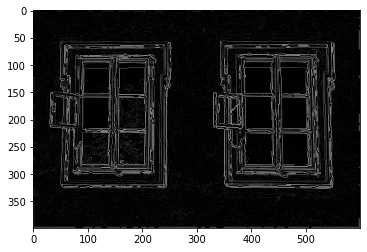

In [26]:
#MagnitudeMat = MagnitudeMat*Scalefactor
nmsImg = non_max_suppression(MagnitudeMat,AngleMat)
plt.imshow(nmsImg, cmap=plt.get_cmap('gray'))


In [27]:
cv2.imwrite("AfterNMS_8.jpg",nmsImg)

True

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image as  Image
# from PIL import ImageFilter

# I = Image.open("BlurImg.jpg")
# I = I.filter(ImageFilter.BLUR)
# p = np.asarray(I).astype('int8')
# w,h = I.size
# x, y = np.mgrid[0:h:500j, 0:w:500j]

# dy, dx = np.gradient(p)
# skip = (slice(None, None, 3), slice(None, None, 3))

# fig, ax = plt.subplots()
# im = ax.imshow(I.transpose(Image.FLIP_TOP_BOTTOM), 
#                extent=[x.min(), x.max(), y.min(), y.max()])
# plt.colorbar(im)
# ax.quiver(x[skip], y[skip], dx[skip].T, dy[skip].T)

# ax.set(aspect=1, title='Quiver Plot')
# plt.show()

# Double threshold: strong/weak/nonedge


In [28]:
def doublethreshold(img, lowThresholdRatio= 1/3, highThresholdRatio=0.55):
    
#     highThreshold = img.max() * highThresholdRatio;
#     lowThreshold = img.max() * lowThresholdRatio;
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;


    
    
    
    M, N = img.shape
    res = np.zeros((M,N))
    
    weak = np.float32(10)
    strong = np.float32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    
    
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    
    
    weak_i, weak_j = np.where((img < highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    
#     upper = res[res ==strong]
#     lower = res[res >=weak]
    

    
    return (res, weak_i,weak_j,strong_i,strong_j,weak,strong)

In [ ]:
#plt.imshow(nmsImg, cmap=plt.get_cmap('gray'))


In [30]:
resEdgeImg,weaki,weakj,strongi,strongj,weak,strong  = doublethreshold(nmsImg)


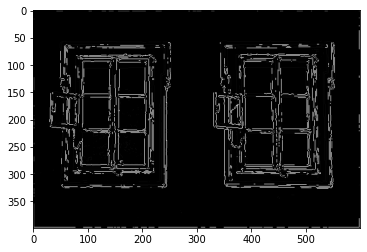

In [31]:
# tmp = doublethreshold(nmsImg)
cv2.imwrite("AfterDoubleThres8_high055_low0333.jpg",resEdgeImg)
plt.imshow(resEdgeImg, cmap=plt.get_cmap('gray'))


In [32]:
strong_edge = [ele for ele in np.dstack((strongi,strongj))]

In [33]:
strong_edge = list(strong_edge[0])

# Hysteresis tracking

In [34]:
def Hysteresis(gradDir,thickedge,strong_edge,weak,strong): 
    
    #紀錄矩陣for那些被走過的粗edge
    res = thickedge #thickedge 裡有 stong edge & weak edge
    
    #轉換成弧度
    angle = gradDir * 180 / np.pi
    #把角度限縮至 0 ~ pi
    angle[angle<0] += 180
    
    
    
    #遍歷所有strong edge，直到strong edge 的鄰居沒有 weak edge
    while strong_edge != []:
        
        for indecies,element in enumerate(strong_edge):
            print(indecies,element)
            
            
            


            i = element[0]
            j = element[1]
            
            print("Start of res{x}{y}'s recursion".format(x = i,y = j))

            
            strong_edge.pop(indecies)

            try:

            #對於每個strong edge point,查看其gradient direction的垂直方向鄰居是某為weak point,是的話加入成strong edge point

               #angle 0
                if (0 <= angle[i][j] < 22.5) or (157.5 <= angle[i][j] <= 180):
                    if(res[i-1][j] == weak):

                        res[i-1][j] =strong
                        strong_edge.append([i-1,j])
                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                    elif(res[i-1][j] ==strong):
                        continue;
                    else:
                        res[i-1][j] = 0



                    if(res[i+1][j] == weak):
                        strong_edge.append([i+1,j])

                        res[i+1][j] =strong
                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                    elif(res[i+1][j] ==strong):
                        continue;
                    else:
                        res[i+1][j] =0

                #angle 45
                elif (22.5 <= angle[i][j] < 67.5):
                    if(res[i-1][j-1] == weak):
                        res[i-1][j-1] =strong
                        strong_edge.append([i-1,j-1])

                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                        
                    elif(res[i-1][j-1] ==strong):
                        continue;
                    else:
                        res[i-1][j-1] = 0

                    if(res[i+1][j+1] == weak):
                        strong_edge.append([i+1,j+1])

                        res[i+1][j+1] =strong
                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                        
                    elif(res[i+1][j+1] ==strong):
                        continue;
                    else:
                        res[i+1][j+1] =0
                #angle 90
                elif (67.5 <= angle[i][j] < 112.5):
                    if(res[i][j+1] == weak):
                        strong_edge.append([i,j+1])

                        res[i][j+1] =strong
                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                        
                    elif(res[i][j+1] ==strong):
                        continue;
                    else:
                        res[i][j+1] = 0

                    if(res[i][j-1] == weak):
                        strong_edge.append([i,j-1])

                        res[i][j-1] =strong
                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                        
                    elif(res[i][j-1] ==strong):
                        continue;
                    else:
                        res[i][j-1] = 0
                #angle 135:
                elif (112.5 <= angle[i][j] < 157.5):
                    if(res[i-1][j+1] == weak):
                        strong_edge.append([i-1,j+1])

                        res[i-1][j+1] =strong
                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                    elif(res[i-1][j+1] ==strong):
                        continue;
                    else:
                        res[i-1][j+1] = 0

                    if(res[i+1][j-1] == weak):
                        strong_edge.append([i+1,j-1])

                        res[i+1][j-1] =strong
                        Hysteresis(gradDir,res,strong_edge,weak,strong)
                    elif(res[i+1][j-1] ==strong):
                        continue;
                    else:
                        res[i+1][j-1] = 0
                print("End of res{x} {y}'s recursion".format(x = i,y = j))


            except IndexError as e:
                pass
       




    return res

In [ ]:
# def hysteresis(img, weak, strong=255):
#     M, N = img.shape  
#     for i in range(1, M-1):
#         for j in range(1, N-1):
#             if (img[i,j] == weak):
#                 try:
#                     if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
#                         or (img[i, j-1] == strong) or (img[i, j+1] == strong)
#                         or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
#                         img[i, j] = strong
#                     else:
#                         img[i, j] = 0
#                 except IndexError as e:
#                     pass
#     return img

In [35]:
AfterHysteris = Hysteresis(AngleMat,resEdgeImg,strong_edge,weak,strong)
#resEdgeImg 裡有 stong edge & weak edge point

0 [1 1]
Start of res11's recursion
End of res1 1's recursion
1 [ 1 44]
Start of res144's recursion
2 [ 1 46]
Start of res146's recursion
3 [ 1 48]
Start of res148's recursion
4 [ 1 50]
Start of res150's recursion
5 [ 1 52]
Start of res152's recursion
6 [ 1 54]
Start of res154's recursion
7 [  1 103]
Start of res1103's recursion
8 [  1 105]
Start of res1105's recursion
9 [  1 107]
Start of res1107's recursion
0 [ 1 43]
Start of res143's recursion
1 [ 1 47]
Start of res147's recursion
2 [ 1 51]
Start of res151's recursion
3 [  1 102]
Start of res1102's recursion
4 [  1 106]
Start of res1106's recursion
5 [  1 127]
Start of res1127's recursion
6 [  1 129]
Start of res1129's recursion
7 [  1 131]
Start of res1131's recursion
8 [  1 133]
Start of res1133's recursion
0 [ 1 45]
Start of res145's recursion
1 [ 1 53]
Start of res153's recursion
2 [  1 126]
Start of res1126's recursion
3 [  1 130]
Start of res1130's recursion
4 [  1 139]
Start of res1139's recursion
5 [  1 141]
Start of res1141'

48 [ 64 502]
Start of res64502's recursion
49 [ 64 504]
Start of res64504's recursion
50 [ 64 547]
Start of res64547's recursion
51 [ 64 553]
Start of res64553's recursion
0 [ 63 439]
Start of res63439's recursion
1 [ 63 447]
Start of res63447's recursion
2 [ 63 455]
Start of res63455's recursion
3 [ 63 463]
Start of res63463's recursion
4 [ 63 547]
Start of res63547's recursion
5 [64 66]
Start of res6466's recursion
6 [ 64 161]
Start of res64161's recursion
7 [ 64 165]
Start of res64165's recursion
8 [ 64 169]
Start of res64169's recursion
9 [ 64 173]
Start of res64173's recursion
10 [ 64 177]
Start of res64177's recursion
11 [ 64 181]
Start of res64181's recursion
12 [ 64 185]
Start of res64185's recursion
13 [ 64 189]
Start of res64189's recursion
14 [ 64 193]
Start of res64193's recursion
15 [ 64 197]
Start of res64197's recursion
16 [ 64 201]
Start of res64201's recursion
17 [ 64 354]
Start of res64354's recursion
18 [ 64 358]
Start of res64358's recursion
19 [ 64 362]
Start of re

0 [ 67 148]
Start of res67148's recursion
1 [ 67 417]
Start of res67417's recursion
2 [ 68 464]
Start of res68464's recursion
3 [ 68 539]
Start of res68539's recursion
4 [69 66]
Start of res6966's recursion
5 [69 74]
Start of res6974's recursion
6 [69 89]
Start of res6989's recursion
7 [69 97]
Start of res6997's recursion
8 [69 99]
Start of res6999's recursion
9 [ 69 101]
Start of res69101's recursion
10 [ 69 103]
Start of res69103's recursion
11 [ 69 128]
Start of res69128's recursion
12 [ 69 130]
Start of res69130's recursion
13 [ 69 132]
Start of res69132's recursion
14 [ 69 134]
Start of res69134's recursion
15 [ 69 139]
Start of res69139's recursion
16 [ 69 141]
Start of res69141's recursion
17 [ 69 143]
Start of res69143's recursion
18 [ 69 145]
Start of res69145's recursion
19 [ 69 149]
Start of res69149's recursion
20 [ 69 151]
Start of res69151's recursion
21 [ 69 153]
Start of res69153's recursion
22 [ 69 155]
Start of res69155's recursion
23 [ 69 157]
Start of res69157's rec

43 [ 82 142]
Start of res82142's recursion
44 [ 82 144]
Start of res82144's recursion
45 [ 82 146]
Start of res82146's recursion
46 [ 82 148]
Start of res82148's recursion
47 [ 82 150]
Start of res82150's recursion
48 [ 82 152]
Start of res82152's recursion
49 [ 82 154]
Start of res82154's recursion
50 [ 82 156]
Start of res82156's recursion
51 [ 82 158]
Start of res82158's recursion
52 [ 82 160]
Start of res82160's recursion
53 [ 82 162]
Start of res82162's recursion
54 [ 82 164]
Start of res82164's recursion
55 [ 82 175]
Start of res82175's recursion
56 [ 82 177]
Start of res82177's recursion
57 [ 82 179]
Start of res82179's recursion
58 [ 82 185]
Start of res82185's recursion
59 [ 82 187]
Start of res82187's recursion
60 [ 82 189]
Start of res82189's recursion
61 [ 82 191]
Start of res82191's recursion
62 [ 82 193]
Start of res82193's recursion
63 [ 82 195]
Start of res82195's recursion
64 [ 82 197]
Start of res82197's recursion
65 [ 82 211]
Start of res82211's recursion
66 [ 82 217

0 [84 92]
Start of res8492's recursion
1 [85 99]
Start of res8599's recursion
2 [ 85 133]
Start of res85133's recursion
3 [ 85 551]
Start of res85551's recursion
4 [ 86 218]
Start of res86218's recursion
5 [ 86 441]
Start of res86441's recursion
End of res86 441's recursion
6 [ 86 512]
Start of res86512's recursion
7 [ 86 551]
Start of res86551's recursion
8 [87 57]
Start of res8757's recursion
9 [87 86]
Start of res8786's recursion
10 [87 88]
Start of res8788's recursion
11 [ 87 143]
Start of res87143's recursion
12 [ 87 148]
Start of res87148's recursion
13 [ 87 150]
Start of res87150's recursion
14 [ 87 156]
Start of res87156's recursion
End of res87 156's recursion
15 [ 87 159]
Start of res87159's recursion
16 [ 87 161]
Start of res87161's recursion
17 [ 87 163]
Start of res87163's recursion
18 [ 87 165]
Start of res87165's recursion
19 [ 87 167]
Start of res87167's recursion
20 [ 87 169]
Start of res87169's recursion
21 [ 87 171]
Start of res87171's recursion
22 [ 87 173]
Start of

6 [ 90 351]
Start of res90351's recursion
7 [ 90 520]
Start of res90520's recursion
0 [89 83]
Start of res8983's recursion
End of res89 83's recursion
1 [ 89 351]
Start of res89351's recursion
2 [ 90 160]
Start of res90160's recursion
3 [ 90 455]
Start of res90455's recursion
4 [91 50]
Start of res9150's recursion
5 [ 91 153]
Start of res91153's recursion
6 [ 91 252]
Start of res91252's recursion
7 [ 91 393]
Start of res91393's recursion
8 [ 91 397]
Start of res91397's recursion
9 [ 91 401]
Start of res91401's recursion
10 [ 91 405]
Start of res91405's recursion
11 [ 91 409]
Start of res91409's recursion
12 [ 91 413]
Start of res91413's recursion
13 [ 91 417]
Start of res91417's recursion
14 [ 91 421]
Start of res91421's recursion
15 [ 91 425]
Start of res91425's recursion
16 [ 91 456]
Start of res91456's recursion
17 [ 91 460]
Start of res91460's recursion
18 [ 91 464]
Start of res91464's recursion
19 [ 91 468]
Start of res91468's recursion
20 [ 91 472]
Start of res91472's recursion
2

0 [ 94 392]
Start of res94392's recursion
1 [ 94 408]
Start of res94408's recursion
2 [ 94 436]
Start of res94436's recursion
3 [ 94 504]
Start of res94504's recursion
4 [ 94 551]
Start of res94551's recursion
5 [95 62]
Start of res9562's recursion
6 [ 95 138]
Start of res95138's recursion
7 [ 95 160]
Start of res95160's recursion
8 [ 95 164]
Start of res95164's recursion
9 [ 95 168]
Start of res95168's recursion
10 [ 95 172]
Start of res95172's recursion
11 [ 95 176]
Start of res95176's recursion
12 [ 95 180]
Start of res95180's recursion
13 [ 95 184]
Start of res95184's recursion
14 [ 95 188]
Start of res95188's recursion
15 [ 95 192]
Start of res95192's recursion
16 [ 95 196]
Start of res95196's recursion
17 [ 95 205]
Start of res95205's recursion
18 [ 95 212]
Start of res95212's recursion
19 [ 95 221]
Start of res95221's recursion
End of res95 221's recursion
20 [ 95 225]
Start of res95225's recursion
End of res95 225's recursion
21 [ 95 344]
Start of res95344's recursion
22 [ 95 3

15 [107 454]
Start of res107454's recursion
16 [107 514]
Start of res107514's recursion
17 [107 550]
Start of res107550's recursion
18 [108  50]
Start of res10850's recursion
19 [108  58]
Start of res10858's recursion
20 [108  91]
Start of res10891's recursion
21 [108 140]
Start of res108140's recursion
0 [105 386]
Start of res105386's recursion
1 [106 451]
Start of res106451's recursion
2 [106 553]
Start of res106553's recursion
3 [107  82]
Start of res10782's recursion
4 [107 205]
Start of res107205's recursion
5 [107 251]
Start of res107251's recursion
6 [107 356]
Start of res107356's recursion
7 [107 451]
Start of res107451's recursion
8 [107 520]
Start of res107520's recursion
0 [106 212]
Start of res106212's recursion
1 [107  56]
Start of res10756's recursion
2 [107 214]
Start of res107214's recursion
3 [107 387]
Start of res107387's recursion
4 [107 553]
Start of res107553's recursion
5 [108  82]
Start of res10882's recursion
6 [108 153]
Start of res108153's recursion
7 [108 205

42 [119 252]
Start of res119252's recursion
43 [119 360]
Start of res119360's recursion
44 [119 389]
Start of res119389's recursion
45 [119 513]
Start of res119513's recursion
46 [120  50]
Start of res12050's recursion
47 [120  84]
Start of res12084's recursion
0 [109 153]
Start of res109153's recursion
1 [110 247]
Start of res110247's recursion
2 [110 550]
Start of res110550's recursion
3 [111 344]
Start of res111344's recursion
4 [111 520]
Start of res111520's recursion
5 [112 218]
Start of res112218's recursion
6 [112 516]
Start of res112516's recursion
7 [113 214]
Start of res113214's recursion
8 [113 514]
Start of res113514's recursion
9 [114 212]
Start of res114212's recursion
10 [114 511]
Start of res114511's recursion
11 [115 205]
Start of res115205's recursion
12 [115 503]
Start of res115503's recursion
13 [116 158]
Start of res116158's recursion
14 [116 454]
Start of res116454's recursion
15 [117 212]
Start of res117212's recursion
16 [117 520]
Start of res117520's recursion


0 [126 455]
Start of res126455's recursion
0 [127  89]
Start of res12789's recursion
1 [127 449]
Start of res127449's recursion
2 [128  54]
Start of res12854's recursion
3 [128  91]
Start of res12891's recursion
4 [128 359]
Start of res128359's recursion
5 [128 544]
Start of res128544's recursion
6 [129  89]
Start of res12989's recursion
7 [129 346]
Start of res129346's recursion
8 [129 514]
Start of res129514's recursion
9 [129 543]
Start of res129543's recursion
10 [129 550]
Start of res129550's recursion
End of res129 550's recursion
11 [130   1]
Start of res1301's recursion
12 [130  66]
Start of res13066's recursion
13 [130  89]
Start of res13089's recursion
14 [130 140]
Start of res130140's recursion
15 [130 158]
Start of res130158's recursion
16 [130 213]
Start of res130213's recursion
17 [130 345]
Start of res130345's recursion
18 [130 387]
Start of res130387's recursion
19 [130 449]
Start of res130449's recursion
20 [130 514]
Start of res130514's recursion
21 [130 541]
Start of

0 [139 547]
Start of res139547's recursion
1 [140  57]
Start of res14057's recursion
2 [140 140]
Start of res140140's recursion
End of res140 140's recursion
3 [140 207]
Start of res140207's recursion
4 [140 245]
Start of res140245's recursion
0 [140   1]
Start of res1401's recursion
1 [140 158]
Start of res140158's recursion
2 [140 350]
Start of res140350's recursion
3 [140 439]
Start of res140439's recursion
4 [140 542]
Start of res140542's recursion
End of res140 542's recursion
5 [141   1]
Start of res1411's recursion
6 [141  58]
Start of res14158's recursion
7 [141  89]
Start of res14189's recursion
8 [141 139]
Start of res141139's recursion
9 [141 150]
Start of res141150's recursion
10 [141 158]
Start of res141158's recursion
11 [141 207]
Start of res141207's recursion
12 [141 243]
Start of res141243's recursion
End of res141 243's recursion
13 [141 250]
Start of res141250's recursion
14 [141 352]
Start of res141352's recursion
15 [141 439]
Start of res141439's recursion
16 [141 

2 [151 336]
Start of res151336's recursion
3 [151 359]
Start of res151359's recursion
4 [151 388]
Start of res151388's recursion
5 [151 452]
Start of res151452's recursion
6 [151 502]
Start of res151502's recursion
7 [151 512]
Start of res151512's recursion
8 [151 520]
Start of res151520's recursion
9 [151 544]
Start of res151544's recursion
10 [152  36]
Start of res15236's recursion
11 [152  61]
Start of res15261's recursion
12 [152  90]
Start of res15290's recursion
13 [152 151]
Start of res152151's recursion
14 [152 213]
Start of res152213's recursion
15 [152 244]
Start of res152244's recursion
16 [152 335]
Start of res152335's recursion
17 [152 359]
Start of res152359's recursion
End of res152 359's recursion
18 [152 361]
Start of res152361's recursion
19 [152 390]
Start of res152390's recursion
End of res152 390's recursion
20 [152 425]
Start of res152425's recursion
21 [152 429]
Start of res152429's recursion
22 [152 431]
Start of res152431's recursion
23 [152 433]
Start of res15

1 [156 336]
Start of res156336's recursion
2 [156 520]
Start of res156520's recursion
3 [157 151]
Start of res157151's recursion
4 [157 194]
Start of res157194's recursion
5 [157 196]
Start of res157196's recursion
6 [157 208]
Start of res157208's recursion
7 [157 218]
Start of res157218's recursion
8 [157 244]
Start of res157244's recursion
9 [157 336]
Start of res157336's recursion
10 [157 341]
Start of res157341's recursion
11 [157 351]
Start of res157351's recursion
12 [157 353]
Start of res157353's recursion
13 [157 357]
Start of res157357's recursion
14 [157 359]
Start of res157359's recursion
15 [157 366]
Start of res157366's recursion
0 [156  90]
Start of res15690's recursion
1 [157  88]
Start of res15788's recursion
End of res157 88's recursion
2 [157 195]
Start of res157195's recursion
3 [157 213]
Start of res157213's recursion
4 [157 331]
Start of res157331's recursion
5 [157 350]
Start of res157350's recursion
6 [157 356]
Start of res157356's recursion
7 [157 365]
Start of 

4 [160 384]
Start of res160384's recursion
5 [160 488]
Start of res160488's recursion
6 [160 496]
Start of res160496's recursion
7 [160 546]
Start of res160546's recursion
8 [161 141]
Start of res161141's recursion
End of res161 141's recursion
9 [161 213]
Start of res161213's recursion
10 [161 240]
Start of res161240's recursion
11 [161 331]
Start of res161331's recursion
12 [161 350]
Start of res161350's recursion
13 [161 359]
Start of res161359's recursion
14 [161 363]
Start of res161363's recursion
15 [161 384]
Start of res161384's recursion
16 [161 440]
Start of res161440's recursion
End of res161 440's recursion
17 [161 445]
Start of res161445's recursion
18 [161 455]
Start of res161455's recursion
0 [160 187]
Start of res160187's recursion
1 [160 355]
Start of res160355's recursion
2 [160 445]
Start of res160445's recursion
0 [160 203]
Start of res160203's recursion
1 [160 492]
Start of res160492's recursion
2 [161  66]
Start of res16166's recursion
3 [161 218]
Start of res16121

0 [165 139]
Start of res165139's recursion
0 [165 384]
Start of res165384's recursion
1 [166 207]
Start of res166207's recursion
2 [166 502]
Start of res166502's recursion
3 [167 152]
Start of res167152's recursion
4 [167 384]
Start of res167384's recursion
5 [167 515]
Start of res167515's recursion
6 [168  79]
Start of res16879's recursion
7 [168 207]
Start of res168207's recursion
8 [168 358]
Start of res168358's recursion
9 [168 455]
Start of res168455's recursion
10 [169  62]
Start of res16962's recursion
11 [169 152]
Start of res169152's recursion
12 [169 244]
Start of res169244's recursion
13 [169 379]
Start of res169379's recursion
14 [169 515]
Start of res169515's recursion
15 [170  84]
Start of res17084's recursion
16 [170 213]
Start of res170213's recursion
17 [170 358]
Start of res170358's recursion
18 [170 504]
Start of res170504's recursion
19 [171  62]
Start of res17162's recursion
20 [171  67]
Start of res17167's recursion
21 [171  79]
Start of res17179's recursion
22 [1

8 [178 506]
Start of res178506's recursion
9 [179  65]
Start of res17965's recursion
10 [179 215]
Start of res179215's recursion
11 [179 342]
Start of res179342's recursion
12 [179 371]
Start of res179371's recursion
13 [179 389]
Start of res179389's recursion
14 [179 504]
Start of res179504's recursion
15 [180  31]
Start of res18031's recursion
16 [180  55]
Start of res18055's recursion
17 [180  77]
Start of res18077's recursion
0 [175  65]
Start of res17565's recursion
1 [176 220]
Start of res176220's recursion
2 [177 157]
Start of res177157's recursion
3 [178 139]
Start of res178139's recursion
4 [179  36]
Start of res17936's recursion
End of res179 36's recursion
5 [179 244]
Start of res179244's recursion
6 [179 379]
Start of res179379's recursion
7 [179 521]
Start of res179521's recursion
8 [180  65]
Start of res18065's recursion
9 [180 141]
Start of res180141's recursion
10 [180 207]
Start of res180207's recursion
11 [180 217]
Start of res180217's recursion
12 [180 244]
Start of 

33 [189 157]
Start of res189157's recursion
34 [189 213]
Start of res189213's recursion
0 [184 207]
Start of res184207's recursion
1 [185 516]
Start of res185516's recursion
2 [186 520]
Start of res186520's recursion
3 [187 336]
Start of res187336's recursion
End of res187 336's recursion
4 [187 504]
Start of res187504's recursion
5 [188  61]
Start of res18861's recursion
6 [188 149]
Start of res188149's recursion
7 [188 217]
Start of res188217's recursion
8 [188 245]
Start of res188245's recursion
9 [188 358]
Start of res188358's recursion
10 [188 379]
Start of res188379's recursion
11 [188 445]
Start of res188445's recursion
12 [188 504]
Start of res188504's recursion
13 [188 518]
Start of res188518's recursion
14 [189  61]
Start of res18961's recursion
15 [189  79]
Start of res18979's recursion
16 [189 142]
Start of res189142's recursion
17 [189 215]
Start of res189215's recursion
18 [189 219]
Start of res189219's recursion
19 [189 240]
Start of res189240's recursion
20 [189 331]
St

83 [199 351]
Start of res199351's recursion
84 [199 364]
Start of res199364's recursion
85 [199 383]
Start of res199383's recursion
86 [199 438]
Start of res199438's recursion
87 [199 445]
Start of res199445's recursion
88 [199 506]
Start of res199506's recursion
89 [199 520]
Start of res199520's recursion
90 [199 542]
Start of res199542's recursion
91 [199 598]
Start of res199598's recursion
92 [200  30]
Start of res20030's recursion
93 [200  35]
Start of res20035's recursion
94 [200  63]
Start of res20063's recursion
95 [200  77]
Start of res20077's recursion
96 [200  83]
Start of res20083's recursion
97 [200 138]
Start of res200138's recursion
98 [200 149]
Start of res200149's recursion
99 [200 206]
Start of res200206's recursion
100 [200 213]
Start of res200213's recursion
101 [200 244]
Start of res200244's recursion
102 [200 336]
Start of res200336's recursion
103 [200 358]
Start of res200358's recursion
0 [193  91]
Start of res19391's recursion
1 [194 213]
Start of res194213's re

0 [202 149]
Start of res202149's recursion
1 [205 218]
Start of res205218's recursion
0 [204   1]
Start of res2041's recursion
1 [206  66]
Start of res20666's recursion
2 [206 380]
Start of res206380's recursion
3 [207  65]
Start of res20765's recursion
4 [207 214]
Start of res207214's recursion
5 [207 331]
Start of res207331's recursion
6 [207 362]
Start of res207362's recursion
End of res207 362's recursion
7 [207 379]
Start of res207379's recursion
8 [207 441]
Start of res207441's recursion
9 [207 516]
Start of res207516's recursion
10 [208  33]
Start of res20833's recursion
11 [208  55]
Start of res20855's recursion
12 [208  59]
Start of res20859's recursion
13 [208 145]
Start of res208145's recursion
14 [208 214]
Start of res208214's recursion
15 [208 331]
Start of res208331's recursion
16 [208 370]
Start of res208370's recursion
17 [208 385]
Start of res208385's recursion
18 [208 503]
Start of res208503's recursion
19 [208 546]
Start of res208546's recursion
20 [209  62]
Start of

5 [216  52]
Start of res21652's recursion
6 [216 150]
Start of res216150's recursion
7 [216 220]
Start of res216220's recursion
8 [216 339]
Start of res216339's recursion
9 [216 343]
Start of res216343's recursion
10 [216 347]
Start of res216347's recursion
11 [216 356]
Start of res216356's recursion
12 [216 378]
Start of res216378's recursion
13 [216 380]
Start of res216380's recursion
14 [216 382]
Start of res216382's recursion
15 [216 441]
Start of res216441's recursion
16 [216 451]
Start of res216451's recursion
17 [216 501]
Start of res216501's recursion
0 [215 367]
Start of res215367's recursion
1 [215 453]
Start of res215453's recursion
2 [215 598]
Start of res215598's recursion
3 [216 214]
Start of res216214's recursion
4 [216 341]
Start of res216341's recursion
5 [216 349]
Start of res216349's recursion
6 [216 379]
Start of res216379's recursion
7 [216 383]
Start of res216383's recursion
8 [216 453]
Start of res216453's recursion
9 [216 515]
Start of res216515's recursion
10 [

10 [220 161]
Start of res220161's recursion
11 [220 165]
Start of res220165's recursion
12 [220 193]
Start of res220193's recursion
13 [220 197]
Start of res220197's recursion
14 [220 201]
Start of res220201's recursion
15 [220 206]
Start of res220206's recursion
0 [218 522]
Start of res218522's recursion
1 [219 187]
Start of res219187's recursion
2 [219 522]
Start of res219522's recursion
3 [220 118]
Start of res220118's recursion
4 [220 136]
Start of res220136's recursion
5 [220 163]
Start of res220163's recursion
6 [220 195]
Start of res220195's recursion
7 [220 204]
Start of res220204's recursion
8 [220 240]
Start of res220240's recursion
9 [220 361]
Start of res220361's recursion
10 [220 403]
Start of res220403's recursion
11 [220 407]
Start of res220407's recursion
12 [220 411]
Start of res220411's recursion
13 [220 415]
Start of res220415's recursion
14 [220 446]
Start of res220446's recursion
15 [220 456]
Start of res220456's recursion
16 [220 520]
Start of res220520's recursio

0 [223 520]
Start of res223520's recursion
1 [224 130]
Start of res224130's recursion
2 [224 165]
Start of res224165's recursion
3 [224 184]
Start of res224184's recursion
4 [224 192]
Start of res224192's recursion
5 [224 214]
Start of res224214's recursion
6 [224 365]
Start of res224365's recursion
7 [224 506]
Start of res224506's recursion
End of res224 506's recursion
8 [224 515]
Start of res224515's recursion
9 [225  64]
Start of res22564's recursion
10 [225 133]
Start of res225133's recursion
End of res225 133's recursion
11 [225 151]
Start of res225151's recursion
12 [225 207]
Start of res225207's recursion
13 [225 218]
Start of res225218's recursion
14 [225 240]
Start of res225240's recursion
15 [225 351]
Start of res225351's recursion
16 [225 362]
Start of res225362's recursion
17 [225 418]
Start of res225418's recursion
18 [225 420]
Start of res225420's recursion
19 [225 422]
Start of res225422's recursion
20 [225 424]
Start of res225424's recursion
21 [225 426]
Start of res22

0 [228 514]
Start of res228514's recursion
1 [230 547]
Start of res230547's recursion
2 [231 440]
Start of res231440's recursion
3 [232 211]
Start of res232211's recursion
4 [232 453]
Start of res232453's recursion
5 [233 240]
Start of res233240's recursion
6 [234  60]
Start of res23460's recursion
0 [230  66]
Start of res23066's recursion
1 [231 520]
Start of res231520's recursion
2 [233  75]
Start of res23375's recursion
3 [234 220]
Start of res234220's recursion
4 [234 546]
Start of res234546's recursion
5 [235 214]
Start of res235214's recursion
6 [235 244]
Start of res235244's recursion
7 [235 362]
Start of res235362's recursion
8 [235 389]
Start of res235389's recursion
9 [235 504]
Start of res235504's recursion
10 [235 545]
Start of res235545's recursion
11 [236  90]
Start of res23690's recursion
12 [236 151]
Start of res236151's recursion
13 [236 204]
Start of res236204's recursion
14 [236 214]
Start of res236214's recursion
15 [236 220]
Start of res236220's recursion
16 [236 2

0 [244 218]
Start of res244218's recursion
1 [246 382]
Start of res246382's recursion
2 [247 504]
Start of res247504's recursion
3 [248  74]
Start of res24874's recursion
4 [248 156]
Start of res248156's recursion
5 [248 218]
Start of res248218's recursion
6 [248 351]
Start of res248351's recursion
7 [248 371]
Start of res248371's recursion
8 [248 373]
Start of res248373's recursion
9 [248 388]
Start of res248388's recursion
10 [248 451]
Start of res248451's recursion
11 [248 504]
Start of res248504's recursion
12 [248 517]
Start of res248517's recursion
13 [248 545]
Start of res248545's recursion
14 [249  63]
Start of res24963's recursion
15 [249  76]
Start of res24976's recursion
0 [245 245]
Start of res245245's recursion
1 [247 545]
Start of res247545's recursion
2 [248 211]
Start of res248211's recursion
3 [248 368]
Start of res248368's recursion
4 [248 379]
Start of res248379's recursion
5 [248 457]
Start of res248457's recursion
6 [248 543]
Start of res248543's recursion
7 [249  

3 [257 545]
Start of res257545's recursion
4 [258 149]
Start of res258149's recursion
5 [258 215]
Start of res258215's recursion
6 [258 351]
Start of res258351's recursion
7 [258 438]
Start of res258438's recursion
8 [258 520]
Start of res258520's recursion
9 [259  59]
Start of res25959's recursion
10 [259 140]
Start of res259140's recursion
11 [259 211]
Start of res259211's recursion
12 [259 351]
Start of res259351's recursion
13 [259 389]
Start of res259389's recursion
14 [259 441]
Start of res259441's recursion
15 [259 503]
Start of res259503's recursion
16 [259 520]
Start of res259520's recursion
17 [259 543]
Start of res259543's recursion
18 [260  59]
Start of res26059's recursion
19 [260  79]
Start of res26079's recursion
20 [260  90]
Start of res26090's recursion
21 [260 149]
Start of res260149's recursion
22 [260 204]
Start of res260204's recursion
23 [260 215]
Start of res260215's recursion
24 [260 244]
Start of res260244's recursion
25 [260 359]
Start of res260359's recursion

22 [272 382]
Start of res272382's recursion
23 [272 508]
Start of res272508's recursion
24 [272 543]
Start of res272543's recursion
25 [273  52]
Start of res27352's recursion
26 [273  89]
Start of res27389's recursion
27 [273 204]
Start of res273204's recursion
28 [273 351]
Start of res273351's recursion
29 [273 439]
Start of res273439's recursion
30 [273 505]
Start of res273505's recursion
31 [273 515]
Start of res273515's recursion
32 [273 524]
Start of res273524's recursion
33 [273 545]
Start of res273545's recursion
34 [274   1]
Start of res2741's recursion
35 [274  59]
Start of res27459's recursion
36 [274  78]
Start of res27478's recursion
0 [267 211]
Start of res267211's recursion
1 [268 543]
Start of res268543's recursion
2 [269 240]
Start of res269240's recursion
3 [269 524]
Start of res269524's recursion
4 [270 214]
Start of res270214's recursion
5 [270 548]
Start of res270548's recursion
6 [271 156]
Start of res271156's recursion
7 [271 379]
Start of res271379's recursion
8 

11 [283 104]
Start of res283104's recursion
12 [283 109]
Start of res283109's recursion
13 [283 113]
Start of res283113's recursion
14 [283 117]
Start of res283117's recursion
15 [283 121]
Start of res283121's recursion
16 [283 143]
Start of res283143's recursion
17 [283 159]
Start of res283159's recursion
18 [283 161]
Start of res283161's recursion
0 [281 143]
Start of res281143's recursion
1 [281 522]
Start of res281522's recursion
2 [282 127]
Start of res282127's recursion
3 [282 204]
Start of res282204's recursion
End of res282 204's recursion
4 [282 508]
Start of res282508's recursion
5 [283 102]
Start of res283102's recursion
6 [283 111]
Start of res283111's recursion
7 [283 119]
Start of res283119's recursion
8 [283 148]
Start of res283148's recursion
9 [283 166]
Start of res283166's recursion
10 [283 168]
Start of res283168's recursion
11 [283 170]
Start of res283170's recursion
12 [283 172]
Start of res283172's recursion
13 [283 174]
Start of res283174's recursion
14 [283 176]

0 [286 406]
Start of res286406's recursion
1 [286 489]
Start of res286489's recursion
2 [288 132]
Start of res288132's recursion
3 [288 153]
Start of res288153's recursion
End of res288 153's recursion
4 [288 351]
Start of res288351's recursion
5 [288 452]
Start of res288452's recursion
0 [286 438]
Start of res286438's recursion
0 [287 518]
Start of res287518's recursion
1 [288 242]
Start of res288242's recursion
2 [288 544]
Start of res288544's recursion
3 [289  63]
Start of res28963's recursion
4 [289 148]
Start of res289148's recursion
5 [289 210]
Start of res289210's recursion
0 [288 140]
Start of res288140's recursion
1 [288 598]
Start of res288598's recursion
2 [289 153]
Start of res289153's recursion
3 [289 244]
Start of res289244's recursion
4 [289 364]
Start of res289364's recursion
5 [289 418]
Start of res289418's recursion
6 [289 420]
Start of res289420's recursion
7 [289 422]
Start of res289422's recursion
8 [289 424]
Start of res289424's recursion
9 [289 426]
Start of res2

0 [292 473]
Start of res292473's recursion
1 [292 505]
Start of res292505's recursion
2 [293 190]
Start of res293190's recursion
0 [292 489]
Start of res292489's recursion
1 [293 207]
Start of res293207's recursion
2 [293 359]
Start of res293359's recursion
3 [294  58]
Start of res29458's recursion
4 [294  78]
Start of res29478's recursion
5 [294  85]
Start of res29485's recursion
End of res294 85's recursion
6 [294 351]
Start of res294351's recursion
7 [294 451]
Start of res294451's recursion
0 [293  88]
Start of res29388's recursion
0 [293 211]
Start of res293211's recursion
0 [293 524]
Start of res293524's recursion
0 [294  76]
Start of res29476's recursion
1 [294 221]
Start of res294221's recursion
End of res294 221's recursion
2 [294 524]
Start of res294524's recursion
3 [295  58]
Start of res29558's recursion
4 [295  97]
Start of res29597's recursion
5 [295 101]
Start of res295101's recursion
6 [295 113]
Start of res295113's recursion
7 [295 115]
Start of res295115's recursion
8 

0 [296 352]
Start of res296352's recursion
End of res296 352's recursion
1 [297 171]
Start of res297171's recursion
2 [297 207]
Start of res297207's recursion
3 [297 412]
Start of res297412's recursion
4 [297 428]
Start of res297428's recursion
5 [297 444]
Start of res297444's recursion
6 [297 484]
Start of res297484's recursion
7 [297 523]
Start of res297523's recursion
End of res297 523's recursion
8 [297 544]
Start of res297544's recursion
9 [297 548]
Start of res297548's recursion
10 [298 149]
Start of res298149's recursion
0 [297  81]
Start of res29781's recursion
1 [297 359]
Start of res297359's recursion
2 [297 436]
Start of res297436's recursion
3 [297 497]
Start of res297497's recursion
4 [297 546]
Start of res297546's recursion
5 [298 161]
Start of res298161's recursion
6 [298 242]
Start of res298242's recursion
7 [298 351]
Start of res298351's recursion
8 [298 361]
Start of res298361's recursion
9 [298 373]
Start of res298373's recursion
10 [298 376]
Start of res298376's rec

Start of res306242's recursion
9 [306 352]
Start of res306352's recursion
10 [306 463]
Start of res306463's recursion
0 [303 162]
Start of res303162's recursion
1 [304 242]
Start of res304242's recursion
2 [305  63]
Start of res30563's recursion
3 [306  58]
Start of res30658's recursion
4 [306 245]
Start of res306245's recursion
5 [306 548]
Start of res306548's recursion
6 [307  63]
Start of res30763's recursion
7 [307 245]
Start of res307245's recursion
8 [307 548]
Start of res307548's recursion
9 [308  63]
Start of res30863's recursion
10 [308 245]
Start of res308245's recursion
11 [308 547]
Start of res308547's recursion
12 [309  61]
Start of res30961's recursion
13 [309 242]
Start of res309242's recursion
14 [309 352]
Start of res309352's recursion
15 [309 547]
Start of res309547's recursion
16 [310  57]
Start of res31057's recursion
0 [303 549]
Start of res303549's recursion
1 [305 458]
Start of res305458's recursion
0 [304 456]
Start of res304456's recursion
1 [306 462]
Start of 

10 [322 113]
Start of res322113's recursion
11 [322 117]
Start of res322117's recursion
12 [322 121]
Start of res322121's recursion
13 [322 168]
Start of res322168's recursion
14 [322 356]
Start of res322356's recursion
15 [322 361]
Start of res322361's recursion
16 [322 365]
Start of res322365's recursion
17 [322 369]
Start of res322369's recursion
18 [322 373]
Start of res322373's recursion
0 [320 104]
Start of res320104's recursion
1 [320 120]
Start of res320120's recursion
2 [320 357]
Start of res320357's recursion
3 [321 455]
Start of res321455's recursion
4 [321 471]
Start of res321471's recursion
5 [322 115]
Start of res322115's recursion
6 [322 123]
Start of res322123's recursion
7 [322 358]
Start of res322358's recursion
8 [322 367]
Start of res322367's recursion
9 [322 388]
Start of res322388's recursion
10 [322 392]
Start of res322392's recursion
11 [322 396]
Start of res322396's recursion
12 [322 400]
Start of res322400's recursion
13 [322 404]
Start of res322404's recursio

28 [326 531]
Start of res326531's recursion
29 [326 533]
Start of res326533's recursion
30 [326 535]
Start of res326535's recursion
31 [326 537]
Start of res326537's recursion
32 [326 539]
Start of res326539's recursion
33 [326 541]
Start of res326541's recursion
0 [323 162]
Start of res323162's recursion
1 [324 393]
Start of res324393's recursion
2 [324 445]
Start of res324445's recursion
3 [324 477]
Start of res324477's recursion
4 [325  60]
Start of res32560's recursion
5 [325 175]
Start of res325175's recursion
6 [325 494]
Start of res325494's recursion
7 [325 498]
Start of res325498's recursion
8 [325 502]
Start of res325502's recursion
9 [325 506]
Start of res325506's recursion
10 [325 510]
Start of res325510's recursion
11 [326   1]
Start of res3261's recursion
12 [326 524]
Start of res326524's recursion
13 [326 528]
Start of res326528's recursion
14 [326 532]
Start of res326532's recursion
15 [326 536]
Start of res326536's recursion
16 [326 540]
Start of res326540's recursion
1

68 [397 536]
Start of res397536's recursion
69 [397 538]
Start of res397538's recursion
70 [397 542]
Start of res397542's recursion
71 [397 544]
Start of res397544's recursion
72 [397 546]
Start of res397546's recursion
73 [397 548]
Start of res397548's recursion
74 [397 550]
Start of res397550's recursion
75 [397 552]
Start of res397552's recursion
76 [397 554]
Start of res397554's recursion
77 [397 556]
Start of res397556's recursion
78 [397 558]
Start of res397558's recursion
79 [397 560]
Start of res397560's recursion
80 [397 562]
Start of res397562's recursion
81 [397 564]
Start of res397564's recursion
82 [397 566]
Start of res397566's recursion
83 [397 568]
Start of res397568's recursion
84 [397 570]
Start of res397570's recursion
85 [397 572]
Start of res397572's recursion
86 [397 574]
Start of res397574's recursion
87 [397 576]
Start of res397576's recursion
88 [397 578]
Start of res397578's recursion
89 [397 580]
Start of res397580's recursion
90 [397 582]
Start of res397582'

0 [117, 151]
Start of res117151's recursion
0 [122, 68]
Start of res12268's recursion
1 [118, 355]
Start of res118355's recursion
0 [111, 84]
Start of res11184's recursion
1 [123, 347]
Start of res123347's recursion
2 [126, 57]
Start of res12657's recursion
0 [123, 243]
Start of res123243's recursion
1 [123, 543]
Start of res123543's recursion
0 [124, 348]
Start of res124348's recursion
1 [123, 518]
Start of res123518's recursion
0 [123, 445]
Start of res123445's recursion
0 [124, 219]
Start of res124219's recursion
0 [124, 250]
Start of res124250's recursion
1 [126, 379]
Start of res126379's recursion
0 [124, 514]
Start of res124514's recursion
1 [126, 350]
Start of res126350's recursion
2 [128, 439]
Start of res128439's recursion
0 [125, 89]
Start of res12589's recursion
0 [126, 554]
Start of res126554's recursion
0 [125, 540]
Start of res125540's recursion
0 [128, 517]
Start of res128517's recursion
0 [125, 455]
Start of res125455's recursion
0 [132, 549]
Start of res132549's recurs

0 [224, 156]
Start of res224156's recursion
1 [226, 502]
Start of res226502's recursion
2 [225, 389]
Start of res225389's recursion
0 [223, 381]
Start of res223381's recursion
End of res223 381's recursion
1 [225, 504]
Start of res225504's recursion
2 [230, 138]
Start of res230138's recursion
0 [226, 441]
Start of res226441's recursion
1 [226, 447]
Start of res226447's recursion
2 [234, 90]
Start of res23490's recursion
0 [227, 211]
Start of res227211's recursion
0 [229, 457]
Start of res229457's recursion
0 [234, 204]
Start of res234204's recursion
0 [234, 548]
Start of res234548's recursion
0 [233, 60]
Start of res23360's recursion
0 [235, 447]
Start of res235447's recursion
1 [237, 457]
Start of res237457's recursion
2 [236, 517]
Start of res236517's recursion
0 [239, 53]
Start of res23953's recursion
0 [238, 380]
Start of res238380's recursion
1 [241, 451]
Start of res241451's recursion
0 [239, 548]
Start of res239548's recursion
0 [238, 384]
Start of res238384's recursion
1 [246, 

0 [100, 378]
Start of res100378's recursion
End of res100 378's recursion
1 [104, 356]
Start of res104356's recursion
0 [100, 519]
Start of res100519's recursion
0 [101, 221]
Start of res101221's recursion
0 [102, 56]
Start of res10256's recursion
0 [103, 82]
Start of res10382's recursion
0 [104, 438]
Start of res104438's recursion
0 [103, 205]
Start of res103205's recursion
0 [105, 520]
Start of res105520's recursion
1 [108, 380]
Start of res108380's recursion
0 [106, 158]
Start of res106158's recursion
End of res106 158's recursion
1 [107, 247]
Start of res107247's recursion
0 [105, 93]
Start of res10593's recursion
0 [118, 84]
Start of res11884's recursion
0 [116, 151]
Start of res116151's recursion
1 [125, 57]
Start of res12557's recursion
End of res125 57's recursion
2 [122, 518]
Start of res122518's recursion
0 [117, 356]
Start of res117356's recursion
1 [122, 445]
Start of res122445's recursion
0 [123, 542]
Start of res123542's recursion
1 [126, 380]
Start of res126380's recursi

0 [94, 421]
Start of res94421's recursion
0 [94, 50]
Start of res9450's recursion
0 [93, 451]
Start of res93451's recursion
0 [99, 78]
Start of res9978's recursion
0 [94, 542]
Start of res94542's recursion
0 [103, 356]
Start of res103356's recursion
0 [99, 519]
Start of res99519's recursion
0 [100, 221]
Start of res100221's recursion
0 [101, 56]
Start of res10156's recursion
0 [102, 82]
Start of res10282's recursion
1 [102, 205]
Start of res102205's recursion
0 [103, 438]
Start of res103438's recursion
0 [107, 380]
Start of res107380's recursion
1 [104, 93]
Start of res10493's recursion
0 [106, 247]
Start of res106247's recursion
0 [117, 84]
Start of res11784's recursion
0 [121, 518]
Start of res121518's recursion
1 [123, 89]
Start of res12389's recursion
0 [121, 445]
Start of res121445's recursion
0 [124, 554]
Start of res124554's recursion
0 [126, 439]
Start of res126439's recursion
0 [123, 455]
Start of res123455's recursion
0 [129, 93]
Start of res12993's recursion
0 [141, 520]
Sta

0 [213, 439]
Start of res213439's recursion
0 [216, 547]
Start of res216547's recursion
0 [231, 90]
Start of res23190's recursion
0 [216, 598]
Start of res216598's recursion
1 [224, 174]
Start of res224174's recursion
0 [224, 211]
Start of res224211's recursion
0 [230, 60]
Start of res23060's recursion
0 [231, 204]
Start of res231204's recursion
0 [233, 517]
Start of res233517's recursion
0 [236, 53]
Start of res23653's recursion
0 [249, 523]
Start of res249523's recursion
0 [249, 86]
Start of res24986's recursion
1 [250, 508]
Start of res250508's recursion
0 [244, 441]
Start of res244441's recursion
0 [253, 59]
Start of res25359's recursion
0 [262, 524]
Start of res262524's recursion
0 [252, 150]
Start of res252150's recursion
1 [257, 454]
Start of res257454's recursion
0 [269, 447]
Start of res269447's recursion
1 [264, 374]
Start of res264374's recursion
0 [261, 81]
Start of res26181's recursion
0 [267, 52]
Start of res26752's recursion
0 [272, 221]
Start of res272221's recursion
0 

0 [188, 438]
Start of res188438's recursion
0 [185, 522]
Start of res185522's recursion
0 [192, 77]
Start of res19277's recursion
1 [198, 385]
Start of res198385's recursion
0 [193, 211]
Start of res193211's recursion
0 [207, 522]
Start of res207522's recursion
0 [208, 453]
Start of res208453's recursion
0 [210, 501]
Start of res210501's recursion
0 [220, 424]
Start of res220424's recursion
0 [211, 439]
Start of res211439's recursion
0 [214, 547]
Start of res214547's recursion
0 [229, 90]
Start of res22990's recursion
0 [224, 176]
Start of res224176's recursion
0 [222, 211]
Start of res222211's recursion
0 [228, 60]
Start of res22860's recursion
0 [229, 204]
Start of res229204's recursion
0 [231, 517]
Start of res231517's recursion
0 [234, 53]
Start of res23453's recursion
0 [247, 523]
Start of res247523's recursion
0 [248, 508]
Start of res248508's recursion
1 [251, 59]
Start of res25159's recursion
0 [262, 374]
Start of res262374's recursion
0 [255, 454]
Start of res255454's recursio

0 [299, 431]
Start of res299431's recursion
0 [318, 415]
Start of res318415's recursion
0 [319, 62]
Start of res31962's recursion
0 [325, 184]
Start of res325184's recursion
0 [319, 193]
Start of res319193's recursion
0 [319, 509]
Start of res319509's recursion
0 [325, 74]
Start of res32574's recursion
0 [62, 501]
Start of res62501's recursion
0 [324, 407]
Start of res324407's recursion
0 [62, 533]
Start of res62533's recursion
0 [63, 429]
Start of res63429's recursion
0 [68, 482]
Start of res68482's recursion
0 [63, 146]
Start of res63146's recursion
0 [69, 84]
Start of res6984's recursion
0 [69, 214]
Start of res69214's recursion
0 [69, 380]
Start of res69380's recursion
0 [69, 456]
Start of res69456's recursion
0 [69, 344]
Start of res69344's recursion
0 [86, 395]
Start of res86395's recursion
0 [71, 240]
Start of res71240's recursion
0 [91, 491]
Start of res91491's recursion
0 [78, 247]
Start of res78247's recursion
0 [94, 427]
Start of res94427's recursion
0 [91, 436]
Start of res

Start of res274364's recursion
0 [295, 431]
Start of res295431's recursion
0 [293, 176]
Start of res293176's recursion
0 [295, 483]
Start of res295483's recursion
0 [299, 140]
Start of res299140's recursion
0 [318, 453]
Start of res318453's recursion
0 [318, 389]
Start of res318389's recursion
0 [299, 434]
Start of res299434's recursion
0 [318, 418]
Start of res318418's recursion
0 [319, 65]
Start of res31965's recursion
0 [325, 187]
Start of res325187's recursion
0 [319, 196]
Start of res319196's recursion
0 [319, 512]
Start of res319512's recursion
0 [325, 77]
Start of res32577's recursion
0 [62, 504]
Start of res62504's recursion
0 [324, 410]
Start of res324410's recursion
0 [62, 536]
Start of res62536's recursion
0 [63, 432]
Start of res63432's recursion
0 [68, 485]
Start of res68485's recursion
0 [63, 149]
Start of res63149's recursion
0 [69, 383]
Start of res69383's recursion
0 [69, 217]
Start of res69217's recursion
0 [69, 459]
Start of res69459's recursion
0 [66, 344]
Start of 

Start of res270364's recursion
1 [295, 487]
Start of res295487's recursion
0 [293, 180]
Start of res293180's recursion
1 [318, 457]
Start of res318457's recursion
0 [299, 144]
Start of res299144's recursion
0 [318, 393]
Start of res318393's recursion
0 [319, 69]
Start of res31969's recursion
0 [318, 422]
Start of res318422's recursion
0 [325, 191]
Start of res325191's recursion
0 [319, 200]
Start of res319200's recursion
0 [319, 516]
Start of res319516's recursion
0 [325, 81]
Start of res32581's recursion
0 [62, 508]
Start of res62508's recursion
0 [324, 414]
Start of res324414's recursion
0 [69, 387]
Start of res69387's recursion
0 [63, 436]
Start of res63436's recursion
0 [63, 153]
Start of res63153's recursion
0 [69, 221]
Start of res69221's recursion
0 [69, 463]
Start of res69463's recursion
1 [86, 402]
Start of res86402's recursion
0 [71, 247]
Start of res71247's recursion
0 [91, 498]
Start of res91498's recursion
0 [94, 490]
Start of res94490's recursion
0 [86, 78]
Start of res86

0 [82, 356]
Start of res82356's recursion
0 [157, 117]
Start of res157117's recursion
0 [204, 211]
Start of res204211's recursion
0 [175, 211]
Start of res175211's recursion
0 [318, 402]
Start of res318402's recursion
0 [251, 144]
Start of res251144's recursion
0 [319, 78]
Start of res31978's recursion
0 [319, 209]
Start of res319209's recursion
0 [325, 200]
Start of res325200's recursion
0 [62, 517]
Start of res62517's recursion
0 [86, 411]
Start of res86411's recursion
0 [94, 499]
Start of res94499's recursion
0 [62, 247]
Start of res62247's recursion
0 [81, 356]
Start of res81356's recursion
0 [157, 118]
Start of res157118's recursion
0 [203, 211]
Start of res203211's recursion
0 [174, 211]
Start of res174211's recursion
0 [318, 403]
Start of res318403's recursion
0 [250, 144]
Start of res250144's recursion
0 [319, 79]
Start of res31979's recursion
0 [319, 210]
Start of res319210's recursion
0 [325, 201]
Start of res325201's recursion
0 [62, 518]
Start of res62518's recursion
0 [86,

End of res297 221's recursion
End of res294 74's recursion
End of res291 82's recursion
End of res292 454's recursion
End of res290 449's recursion
End of res290 457's recursion
End of res290 212's recursion
End of res288 452's recursion
End of res289 383's recursion
End of res288 81's recursion
End of res286 146's recursion
End of res284 441's recursion
End of res284 388's recursion
End of res284 137's recursion
End of res283 438's recursion
End of res284 87's recursion
End of res281 165's recursion
End of res279 517's recursion
End of res279 160's recursion
End of res275 163's recursion
0 [269, 374]
Start of res269374's recursion
End of res268 374's recursion
End of res259 507's recursion
End of res256 150's recursion
End of res251 374's recursion
End of res249 375's recursion
End of res249 84's recursion
End of res249 381's recursion
End of res249 76's recursion
End of res247 447's recursion
End of res248 82's recursion
End of res244 84's recursion
End of res239 383's recursion
End 

In [36]:
AfterHysteris[AfterHysteris >=10].shape

(22201,)

In [38]:
AfterHysteris[AfterHysteris <=10] = 0

In [39]:
AfterHysteris[AfterHysteris >=10].shape

(13348,)

True

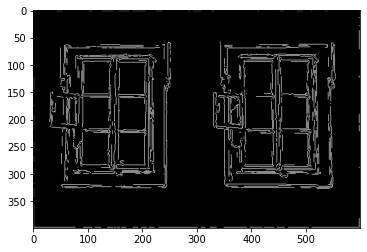

In [40]:
plt.imshow(AfterHysteris, cmap=plt.get_cmap('gray'))
cv2.imwrite("AfterHysteris_actual.jpg",AfterHysteris)


# Call openCV.canny()

In [42]:
randimg =cv2.imread("demonstrating.jpg",0)

edges = cv2.Canny(randimg,47,140,3,L2gradient=True)


True

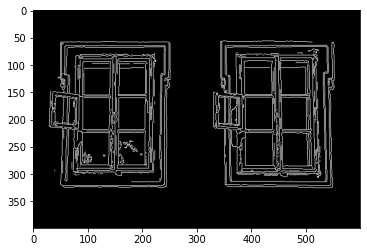

In [43]:
plt.imshow(edges, cmap=plt.get_cmap('gray'))
cv2.imwrite("OpencvCanny_055.jpg",edges)


In [ ]:
resEdgeImg